## Week2 Second Project - JOBIS & Villains
### 제공 데이터: 자비스앤빌런스에서 제공해준 "Jobis_3o3.csv"(고객의 근로/사업/기타소득에 대한 정보)
### 프로젝트 목적: 자비스앤빌런즈에서 제공된 데이터로 아래의 질문의 해답을 찾아보기 
#### 1. 고객의 결제여부에 영향을 미치는 요인들은 무엇인가?
#### 2. 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야하는가?

## JOBIS & Villains 기업소개 
<center>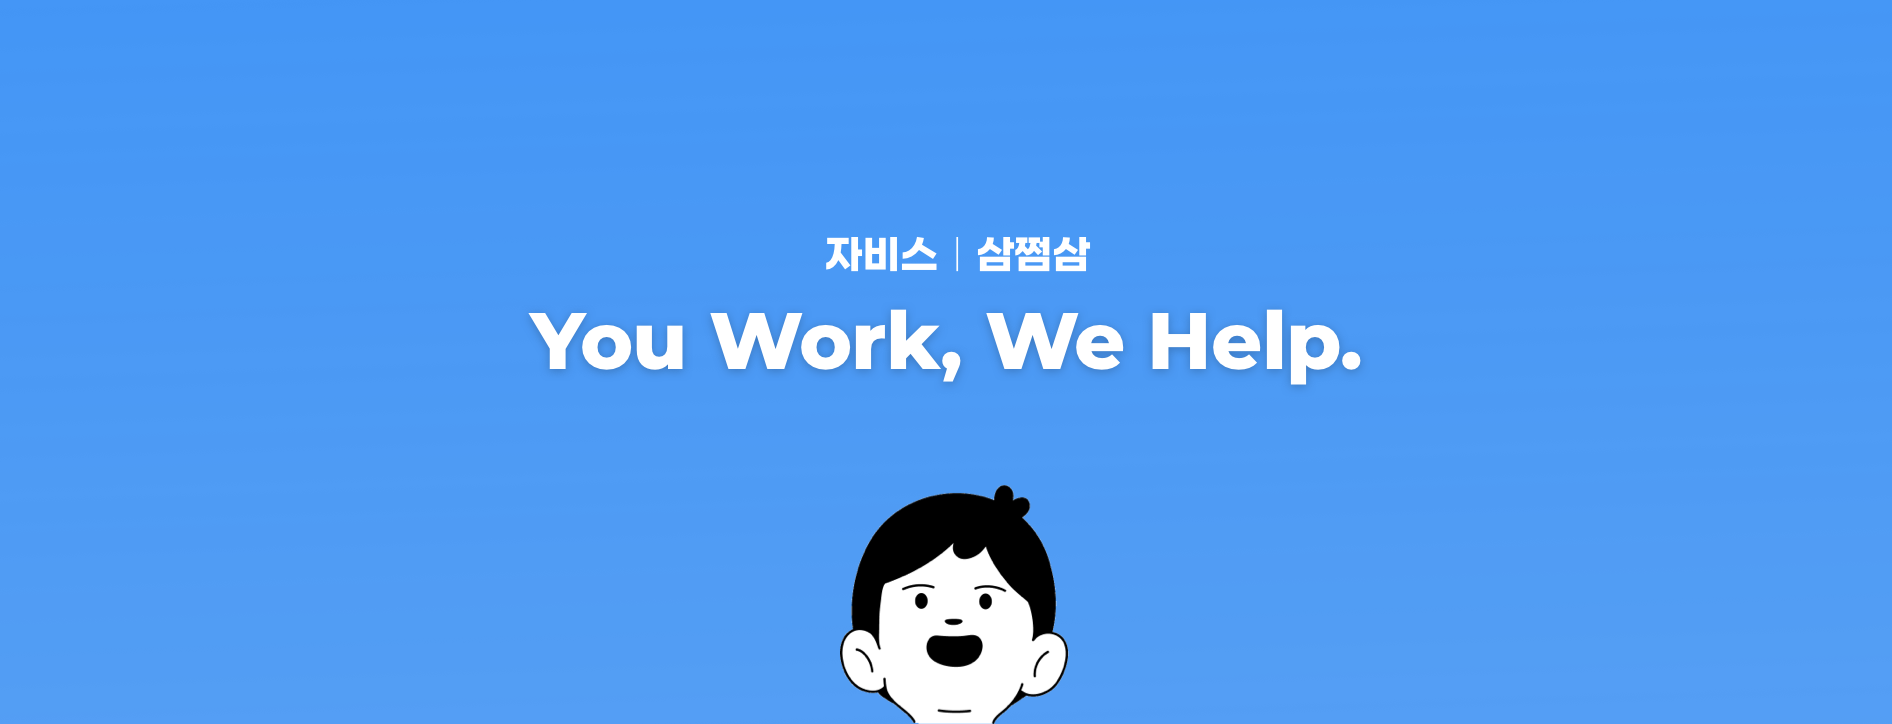</center>

- 참고: [로켓펀치](https://www.rocketpunch.com/companies/jobisnv)
- 설립일: 2015년 08월 12일 (설립 7년차)
- 산업 분야: 웹서비스, 어플리케이션, 클라우드서비스, 세무회계, 경영지원, 기업용클라우드, 노무관리, 경영지원서비스
- 사업 부문
    1. 인공지능 경리, **자비스**: 회계와 급여관리를 자동화하는 **'인공지능 경리'** 서비스
    - 회계를 모르는 사람, 전담 인원을 채용하기 어려운 중소사업자들이 경리 업무인 **잔고 현황**, **각종 비용 내역**, **급여 계산**을 관리할 수 있는 서비스 
    - 자비스 공식 홈페이지: [자비스](https://jobis.co)
    2. **삼쩜삼**: 국민 **세금환급** 솔루션 
    - 2020년 3월 출시 후, 누적 가입자 수 3,000,000 명, 홈택스 계정만 입력하면 5초안에 최대 환급액 확인과 세무사를 통한 신고대행까지 원스톱으로 누릴 수 있는 종합소득세 신고 서비스 
    - 삼쩜삼 공식 홈페이지: [삼쩜삼](https://www.3o3.co.kr)
- 관련 참조 기사들: 
    - [종합소득세 신고, 일반인 10명 중 8명은 모른다](http://m.nistart.co.kr/news/newsview.php?ncode=1065546348421466)
    - [자비스앤빌런즈 '삼쩜삼', 누적 가입자수 100만명 달성](https://www.ebn.co.kr/news/view/1479187)
    - [자비승랜빌런즈 삼쩜삼, 누적 환급액 1000억원 돌파](http://it.chosun.com/site/data/html_dir/2021/06/08/2021060800753.html)

## 1. 데이터 확인하기

### 1-1. 패키지 및 데이터 불러오기 

In [1]:
# 패키지 import 
import pandas as pd
import numpy as np

# 그래프 관련 패키지 import 
import matplotlib.pyplot as plt  # mpatplotlib.pyplot
%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates #  그래프의 원하는 날짜 형식으로 포멧 셋팅 Matplotlib.dates
import matplotlib.animation as animation # 그래프 애니메이션 효과 셋팅 Matplotlib.animation
import missingno as msno # 결측치 그래프 확인 missingno 패키지

import seaborn as sns
sns.set_style('darkgrid') # seaborn 그래프 background 회색으로 설정 
sns.set_context('talk') # 컨텍스트 매개 변수를 변경 플롯의 레이블에 대한 기본 글꼴 크기를 제어하는데 사용
sns.set(font_scale = 1)

import plotly.express as px # plotly.express
import plotly.io as pio # plotly 라이브러리를 표기하기 위해 추가한 코드 
pio.renderers.default = "notebook_connected"


# 모델링 관련 패키지 import 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import warnings   # 버전 충돌로 나오는 경고 표시를 표시하지 않게 설정 
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc   
# plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# 데이터 불러오기 - 삼쩜삼 이용 데이터 
df = pd.read_csv('data/Jobis_3o3.csv')
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


- 테이블의 내용은 아래의 내용을 담고 있습니다.
    1. 고객이 각 귀속년도별
    2. 근로 / 사업 / 기타 소득에 대한 예상환급액과 수수료를 조회한 뒤
    3. 결제를 하거나 하지 않은 여부를 저장

### 1-2. 데이터 살펴보기 

In [3]:
# 데이터 정보 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


- 컬럼 정보
    - age: 고객의 만 나이입니다.
    - gender: 고객의 성별입니다.
    - year: 소득이 발생한 연도(귀속년도)입니다.
    - refund: 예상환급액입니다.
    - fee: 수수료입니다.
    - has_paid: 수수료를 결제했는지의 여부
    - income_근로: 고객의 근로소득(월급/일용직급여)
    - income_사업: 고객의 사업소득(프리랜서 소득)
    - income_기타: 고객의 기타소득(그외 기타 소득)

In [4]:
# 결측치 확인하기
for i in df.columns:
    ab = df[i].isnull().sum()
    if ab < 100000:
        print(i + "has {} null values.".format(ab))
        print()

agehas 0 null values.

genderhas 0 null values.

yearhas 0 null values.

refundhas 0 null values.

feehas 0 null values.

has_paidhas 0 null values.

income_근로has 59209 null values.

income_사업has 21773 null values.

income_기타has 74740 null values.



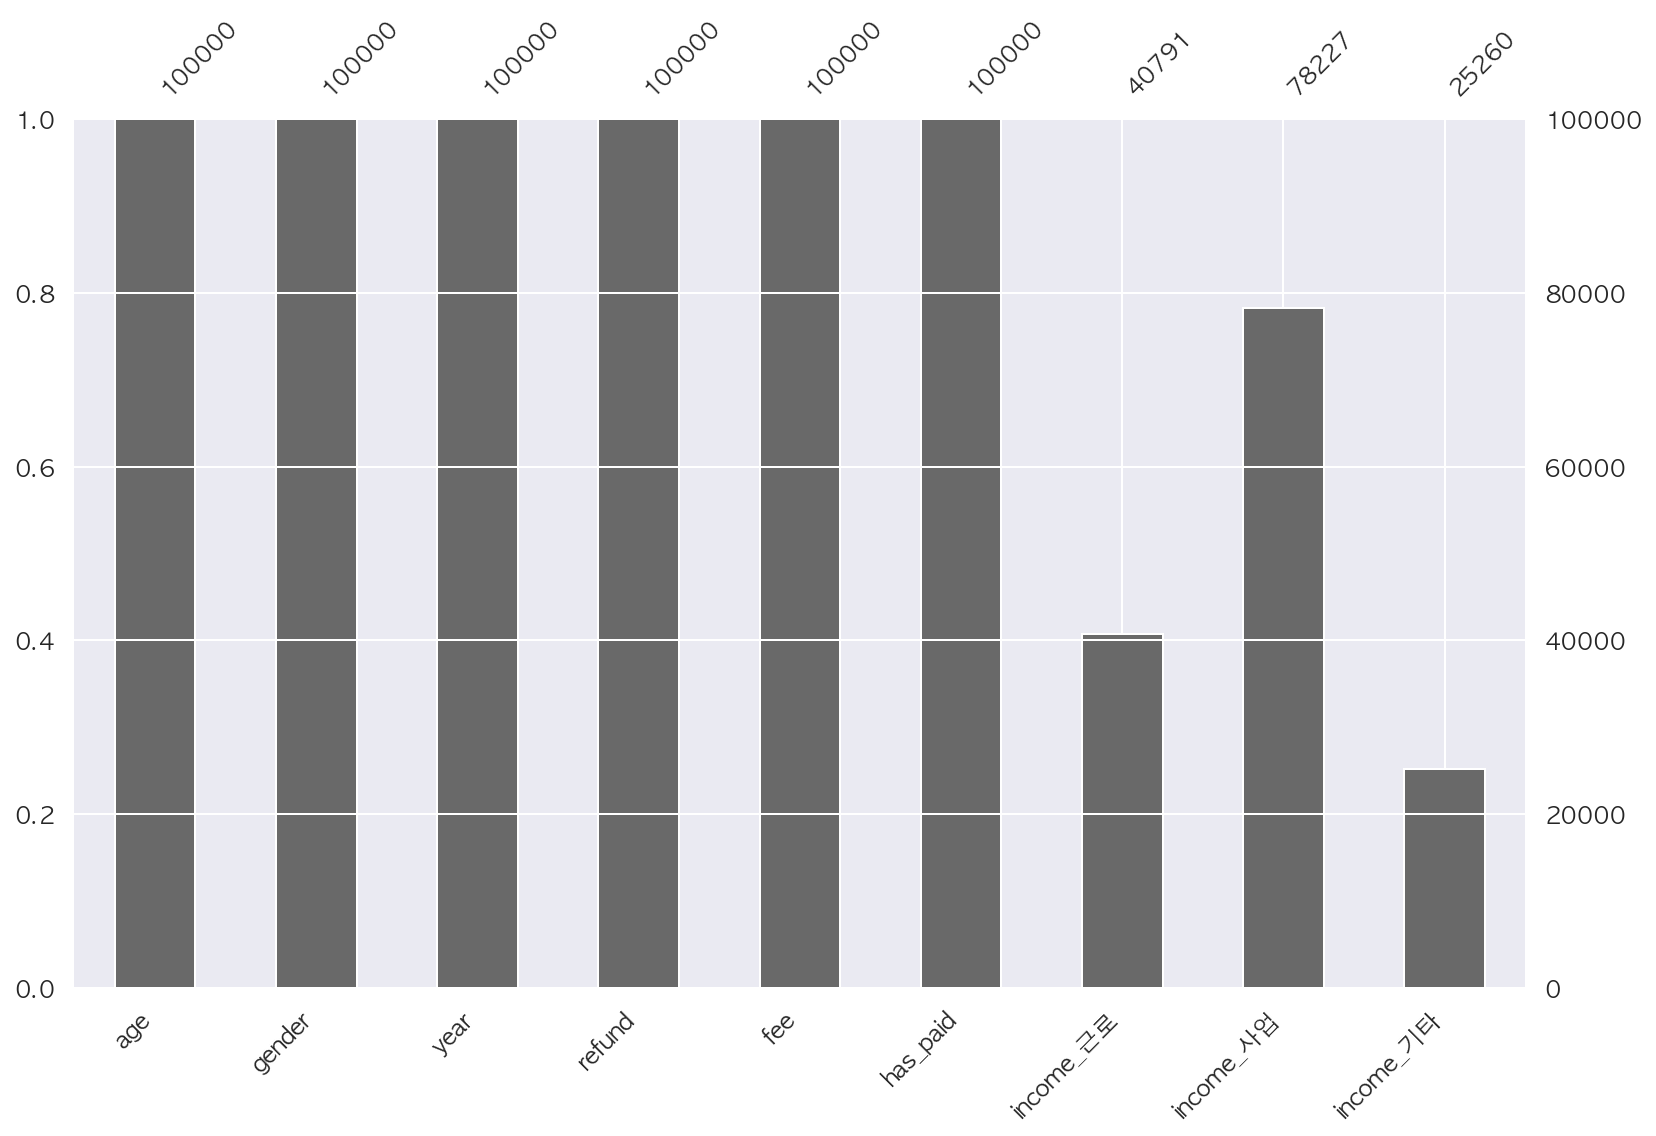

In [5]:
# 결측치 그래프로 나타내기
msno.bar(df, fontsize=12, figsize=(13,8));

- 근로소득, 사업소득, 기타소득에 결측치가 다수 존재 (각각 **59209개**, **21773개**, **74740개**)
- 결측치가 다수 존재하긴 하지만 해당 NaN 값은 결국 소득이 없는 것으로 판단되어 소득의 결측치를 0으로 채워넣어도 될 것이라 판단됨.

In [6]:
# 결측치를 0으로 채우기 
df = df.fillna(0)
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0


In [7]:
# 각 column당 row 값 현황 정리 
for col in df.columns:
    print(f"column : {col}")
    print(f"The number of unique : {df[col].nunique()}")  # nunique: 유니크한 value의 갯수를 나타내는 함수
    print()

column : age
The number of unique : 65

column : gender
The number of unique : 3

column : year
The number of unique : 6

column : refund
The number of unique : 1964

column : fee
The number of unique : 352

column : has_paid
The number of unique : 2

column : income_근로
The number of unique : 15082

column : income_사업
The number of unique : 8520

column : income_기타
The number of unique : 2866



## 2. 첫 번째 EDA - 데이터 탐색하기

### 2-1. 소득이 발생한 년도 건수 

In [8]:
df['year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2020])

In [9]:
# 소득이 발생한 년도별 건수 분포 
year_2015_count = len(df[df['year']==2015])
year_2016_count = len(df[df['year']==2016])
year_2017_count = len(df[df['year']==2017])
year_2018_count = len(df[df['year']==2018])
year_2019_count = len(df[df['year']==2019])
year_2020_count = len(df[df['year']==2020])
print('2015년 기준 건수:', year_2015_count, '건')
print('2016년 기준 건수:', year_2016_count, '건')
print('2017년 기준 건수:', year_2017_count, '건')
print('2018년 기준 건수:', year_2018_count, '건')
print('2019년 기준 건수:', year_2019_count, '건')
print('2020년 기준 건수:', year_2020_count, '건')

2015년 기준 건수: 3985 건
2016년 기준 건수: 13913 건
2017년 기준 건수: 17495 건
2018년 기준 건수: 19983 건
2019년 기준 건수: 20842 건
2020년 기준 건수: 23782 건


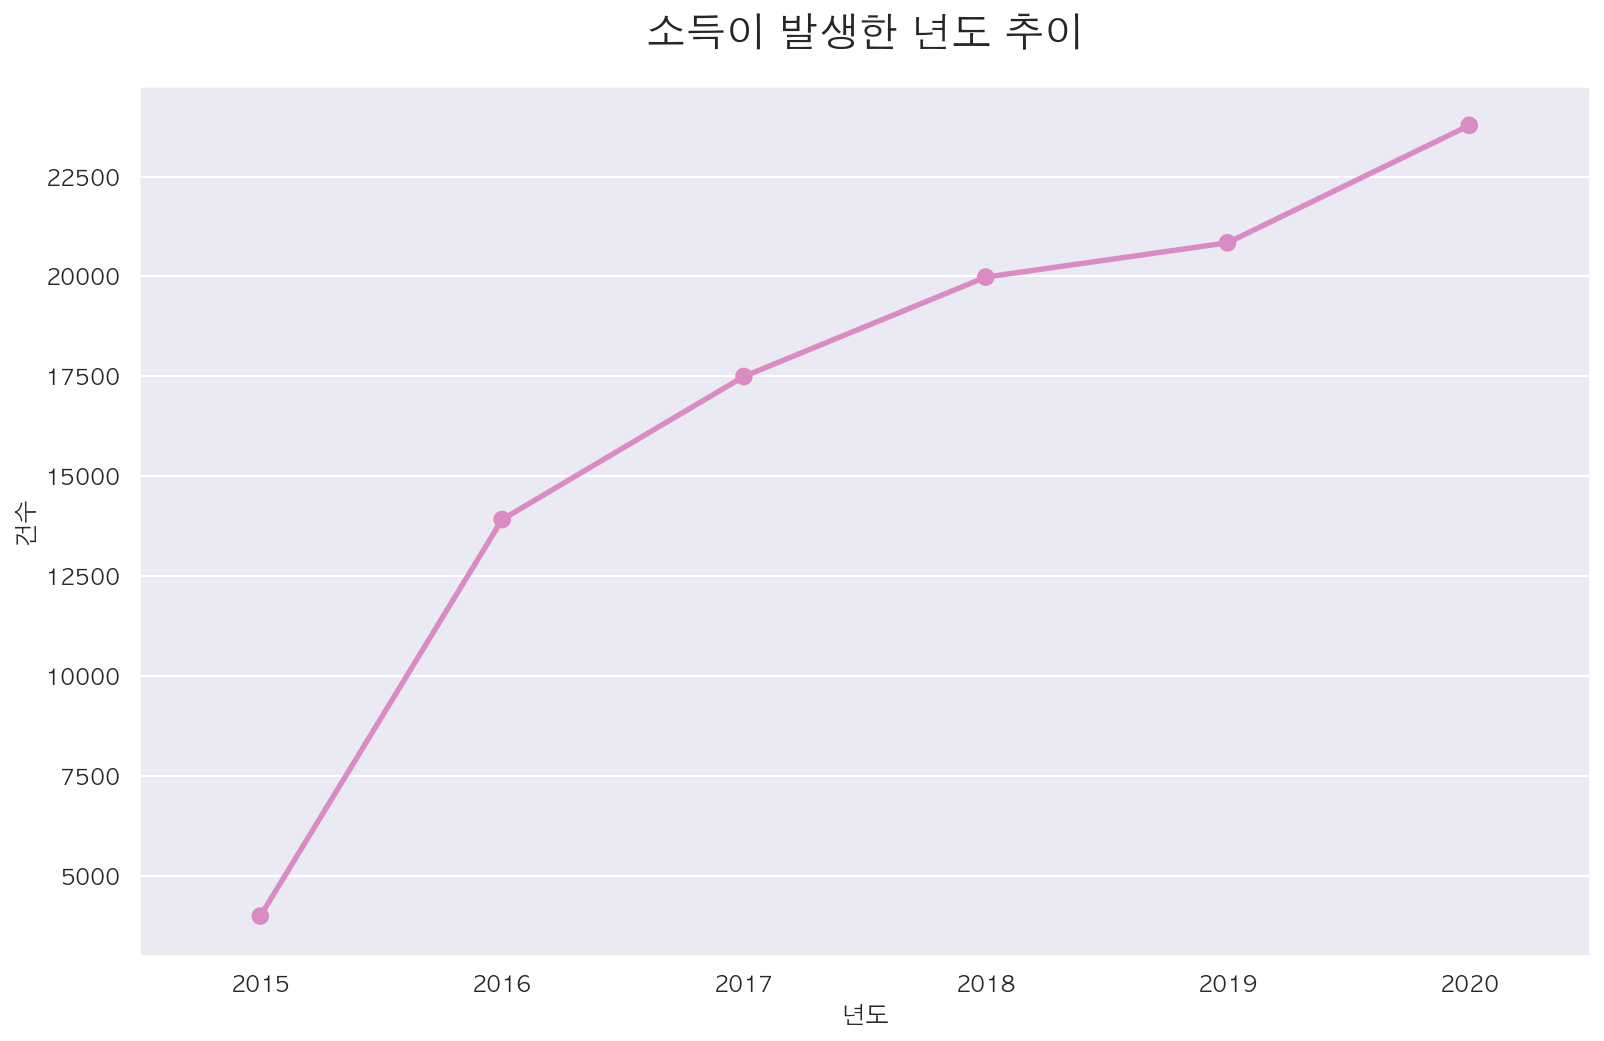

In [10]:
# 그래프로 나타내보기
df_year = pd.DataFrame({'year': [2015, 2016, 2017, 2018, 2019, 2020],
                       'case': [3985, 13913, 17495, 19983, 20842, 23782],
                       })

plt.figure(figsize=[13,8])
sns.pointplot(data=df_year, x='year', y="case", color=sns.color_palette()[6])
plt.title("소득이 발생한 년도 추이", fontsize=20, pad=20);
plt.xlabel('년도')
plt.ylabel('건수')
plt.show()

- 데이터는 2015년 부터 2020년 까지 있다.
- 년도별 소득이 발생한 건수를 보니 계속해서 증가 추이를 나타내고 있다. 
    - 해마다 소득이 느는건 당연하다. (근로 -> 연봉해마다 증가, 사업 -> 물가상승 등의 원인으로 증가)
- 그저 언급된 건수이지 여기서 소득에 따라, 수수료 결제 여부 등 변수들에 따라 다르게 해석될 수 있음. 데이터를 더 면밀히 봐야함.

### 2-2. 연령대 분포

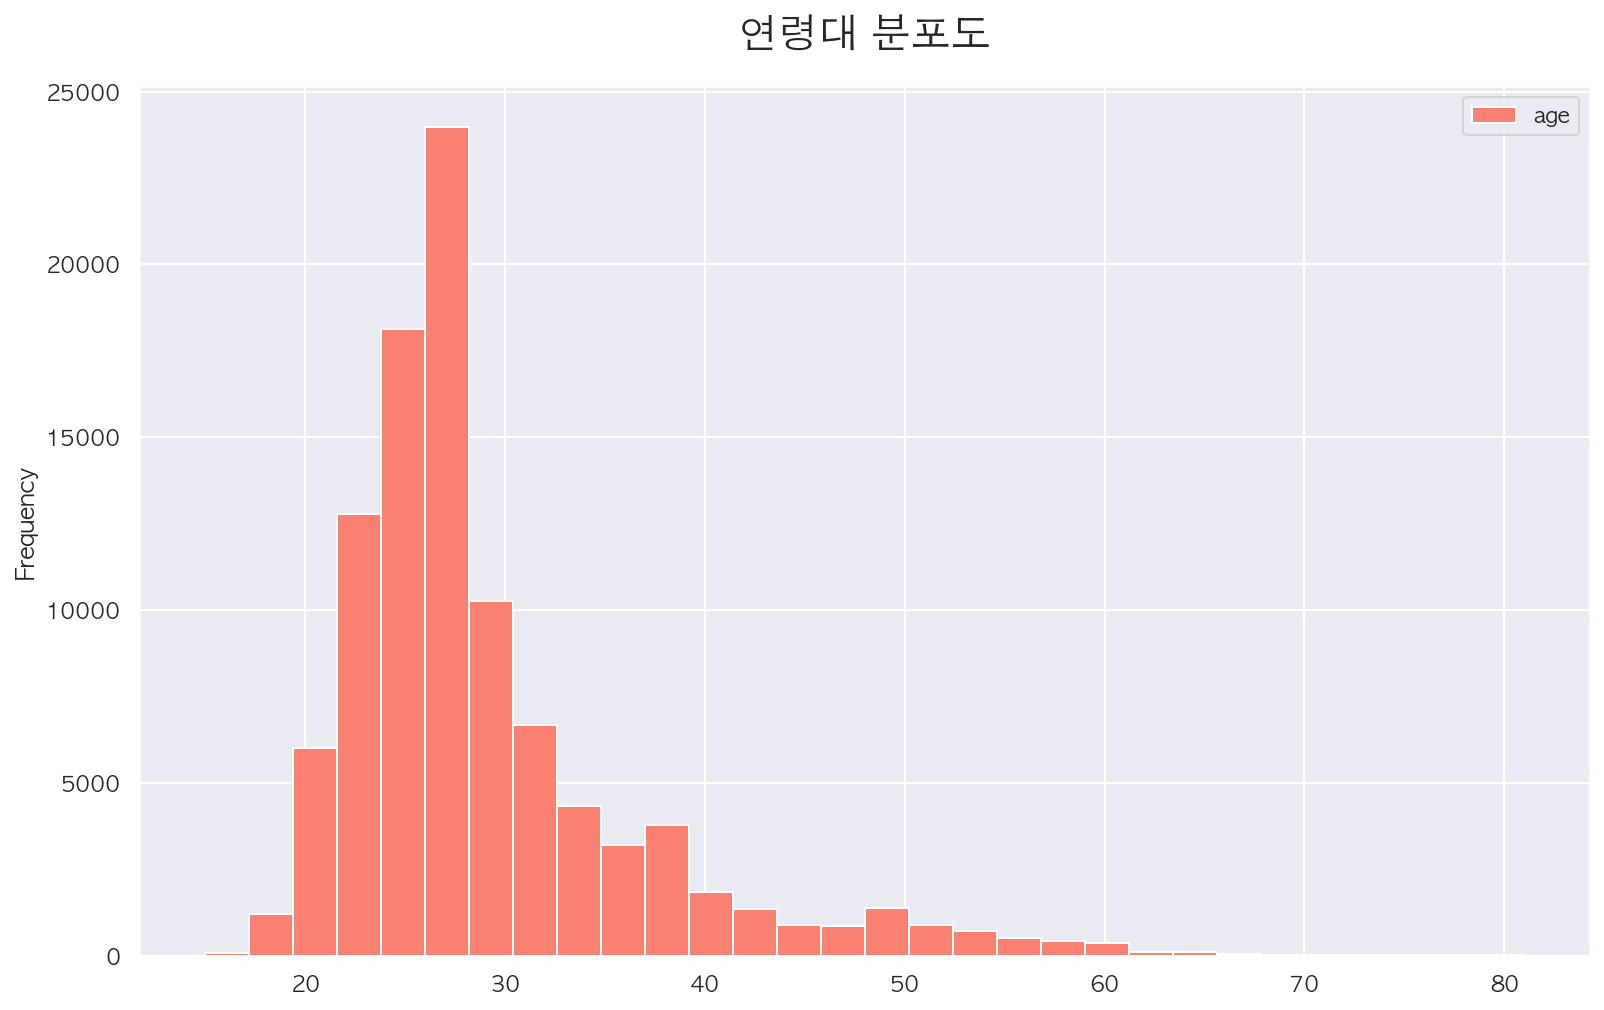

In [11]:
# 연령대 분포도 그래프
df.plot(kind='hist', y='age', bins=30, figsize=(13, 8), color= 'salmon')
plt.title("연령대 분포도", fontsize=20, pad=20)
plt.show()

- 연령대 분포를 보니 20대의 비중이 높다. (소득활동을 활발하게 하는 연령대이기 때문으로 파악됨)
- 가장 낮은 비중은 60대 이다. (소득 활동에서 은퇴를 많이 하는 연령대이기 때문으로 팍악됨)

### 2-3. 남녀 성별 비율 

In [12]:
# 남녀 성별 비율 살펴보기 
male = df[df['gender'] == 'M'] 
female = df[df['gender'] == 'F']
non_gender = df[df['gender'] == '-']

print('남성 그룹: 총', len(male), '건')
print('여성 그룹: 총', len(female), '건')
print('성별 표시 없음 그룹: 총', len(non_gender), '건')
print('남성 비율:', '%.2f'% (len(male)/len(df)*100), '%')
print('여성 비율:', '%.2f'% (len(female)/len(df)*100),'%')
print('성별 표시 없음 비율:', '%.2f'% (len(non_gender)/len(df)*100),'%')

남성 그룹: 총 50477 건
여성 그룹: 총 49501 건
성별 표시 없음 그룹: 총 22 건
남성 비율: 50.48 %
여성 비율: 49.50 %
성별 표시 없음 비율: 0.02 %


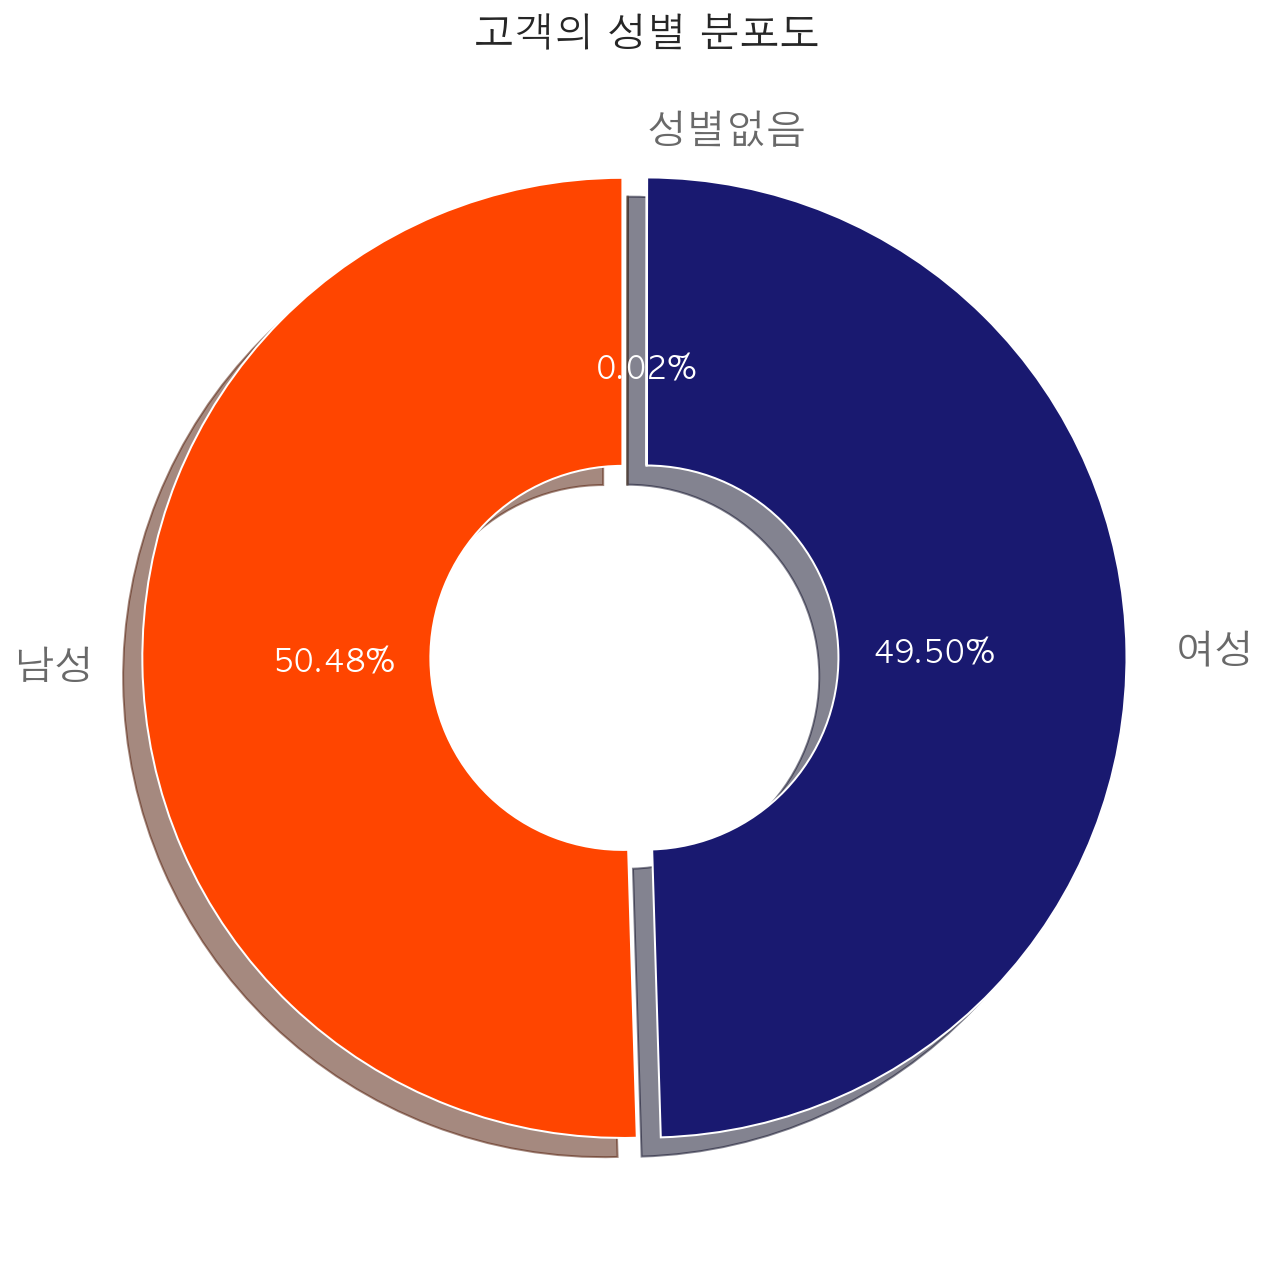

In [13]:
# 성별 분포 차트로 표현
labels = ['남성','여성','성별없음'] ## 라벨
frequency = [50477, 49501, 22] ## 빈도
    
plt.figure(figsize=(13,9)) # 차트 사이즈 
explode = (0.05, 0, 0)  # 튀어나오는 정도 결정 
colors = ['orangered','midnightblue','sandybrown']  
plt.title("고객의 성별 분포도", fontsize=20)  # 차트 타이틀
patches, texts, autotexts = plt.pie(frequency, # 차트에 적용될 값
        explode=explode,  # 특정 값 튀어나오게 강조
        labels=labels,    # 라벨 출력
        colors=colors,    # 색상 설정 
        autopct=lambda p : '{:.2f}%'.format(p) ,  # 퍼센테이지 출력
        shadow=True,     # 차트 그림자 부
        startangle=90,    # 시작점을 90도로 지정
        wedgeprops=dict(width=0.6) # 중간의 반지름 0.5 만큼 구멍을 냄
       )

## label만 변경해주기 
for t in texts:
    t.set_color("dimgrey")
    t.set_fontsize(20)
## pie 위의 텍스트를 다른 색으로 변경해주기 
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(15)
plt.tight_layout()
plt.show()

plt.show()

plt.show()

In [14]:
# 0.02%의 성별없음 확인 
non_gender

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
2613,27.0,-,2016,559000.0,12800.0,False,0.0,0.0,0.0
4101,27.0,-,2017,209000.0,4300.0,False,0.0,0.0,0.0
9574,42.0,-,2015,175000.0,4300.0,False,0.0,0.0,0.0
20536,26.0,-,2017,845000.0,25100.0,False,0.0,0.0,0.0
28211,26.0,-,2016,650000.0,12800.0,False,0.0,0.0,0.0
36217,27.0,-,2018,124000.0,3400.0,False,0.0,0.0,0.0
37674,27.0,-,2015,252000.0,8500.0,False,0.0,0.0,0.0
38223,53.0,-,2015,6000.0,400.0,False,0.0,0.0,0.0
38441,23.0,-,2018,110000.0,3000.0,False,0.0,0.0,0.0
41454,41.0,-,2015,122000.0,4300.0,True,0.0,0.0,0.0


- 고객의 성별 중 남성은 50.48% (50477 건), 여성은 49.50% (49501 건), 성별 표시 없음은 0.02% (22 건)으로 나타남
- 남성과 여성의 비율이 대체적으로 비슷한 것으로 나타났다.
- 성별마다 소득의 종류와 예상환급액, 수수료 등이 다르다, 자료를 면밀히 볼 필요가 있어보임.
- 성별 표시 없음을 살펴 보니 수입이 없는 그룹임을 알 수 있다. 
- 팀원분들과 회의 결과 해당 자료는 drop을 하는 것이 좋다고 판단함.

In [15]:
# 성별 없음 drop
df = df[df.gender != '-']

### 2-4. 예상환급액 

In [16]:
# 예상환급액 정보 
df['refund'].describe()

count    9.997800e+04
mean     2.081344e+05
std      3.071874e+05
min     -8.265000e+06
25%      3.300000e+04
50%      9.900000e+04
75%      2.540000e+05
max      7.725000e+06
Name: refund, dtype: float64

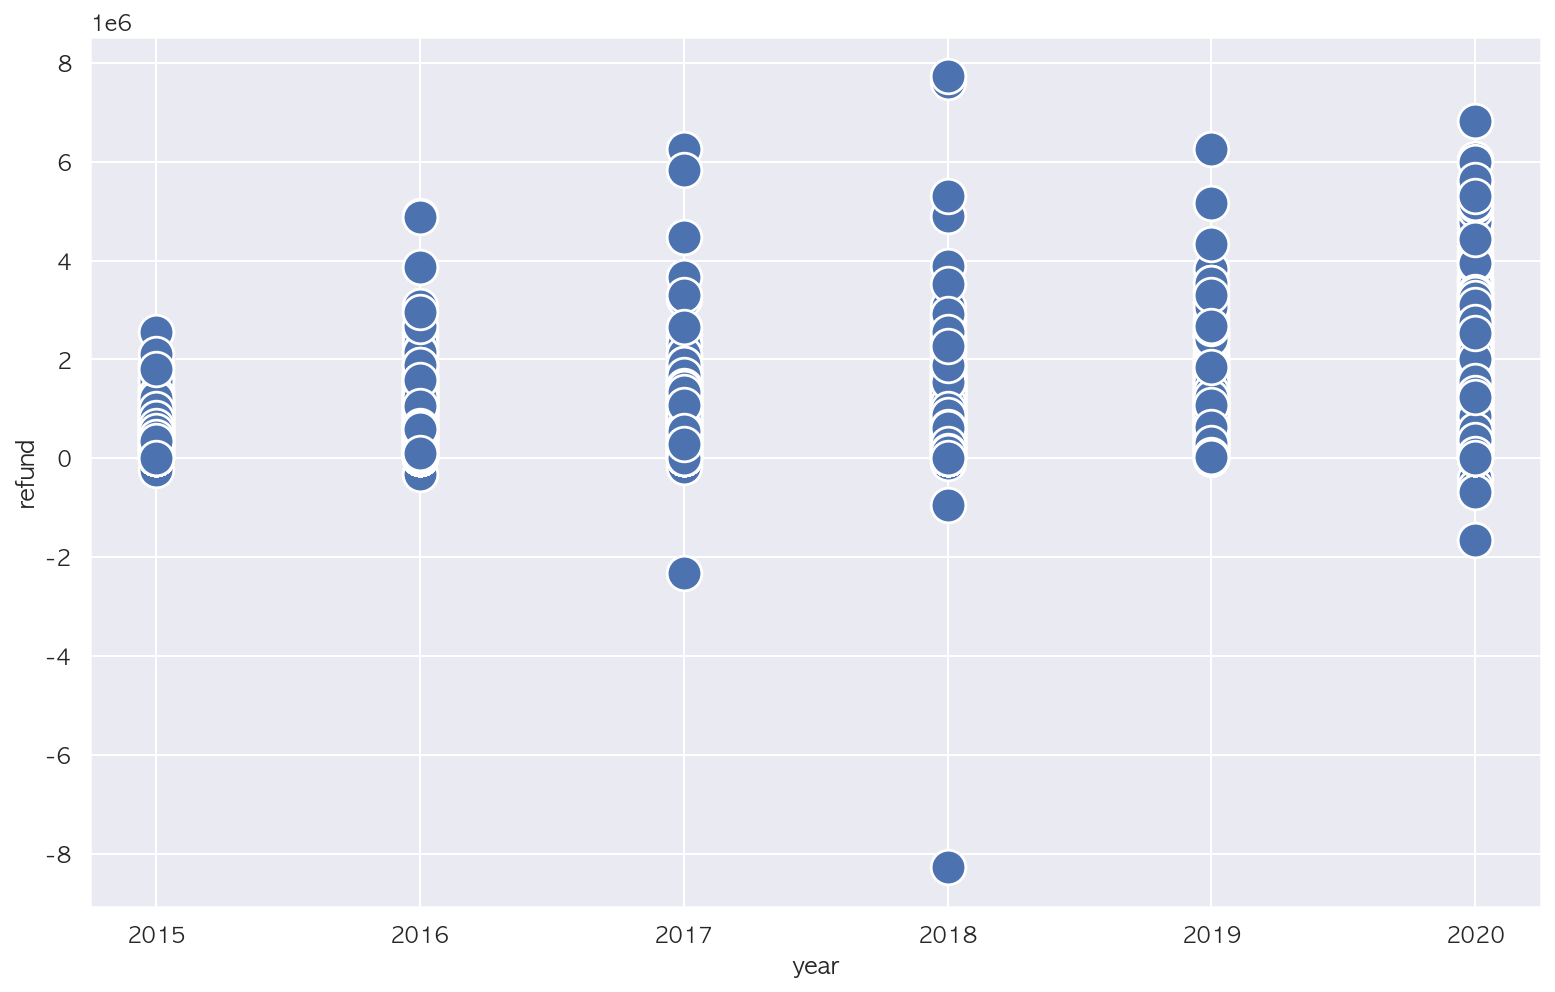

In [17]:
# 년도별 예상 환급액 그래프로 표현
plt.figure(figsize=(13,8))
sns.scatterplot(data=df, x='year', y='refund', s=300)
plt.show()

- 예상 환급액의 정보는 다음과 같다.
    - 평균: **208,142.2 원**
    - 표준편차: 307,174.4 원
    - 최솟값: **-8,265,000 원**
    - Q1(25%)값: 33,000 원
    - 중앙값: **99,000 원**
    - Q3(75%)값: 254,000 원
    - 최대값: **7,725,000 원**
- 해마다 예상 환급액은 증가한다, 소득이 증가하니 당연한 현상 같다.
- 예상 환급액 평균은 20만원, 최소값은 -8백만원 중앙값 9만9천원, 최대값은 7백만원 이다.
- 최소값이 마이너스가 있어 그래프로 나타내어 보니 많이는 아니지만 소수로 마이너스 값이 있는듯 하다.


### 2-5. 수수료 

In [18]:
df['fee'].describe()

count     99978.000000
mean       7247.600472
std       11927.359152
min         400.000000
25%         400.000000
50%        4300.000000
75%        8500.000000
max      307000.000000
Name: fee, dtype: float64

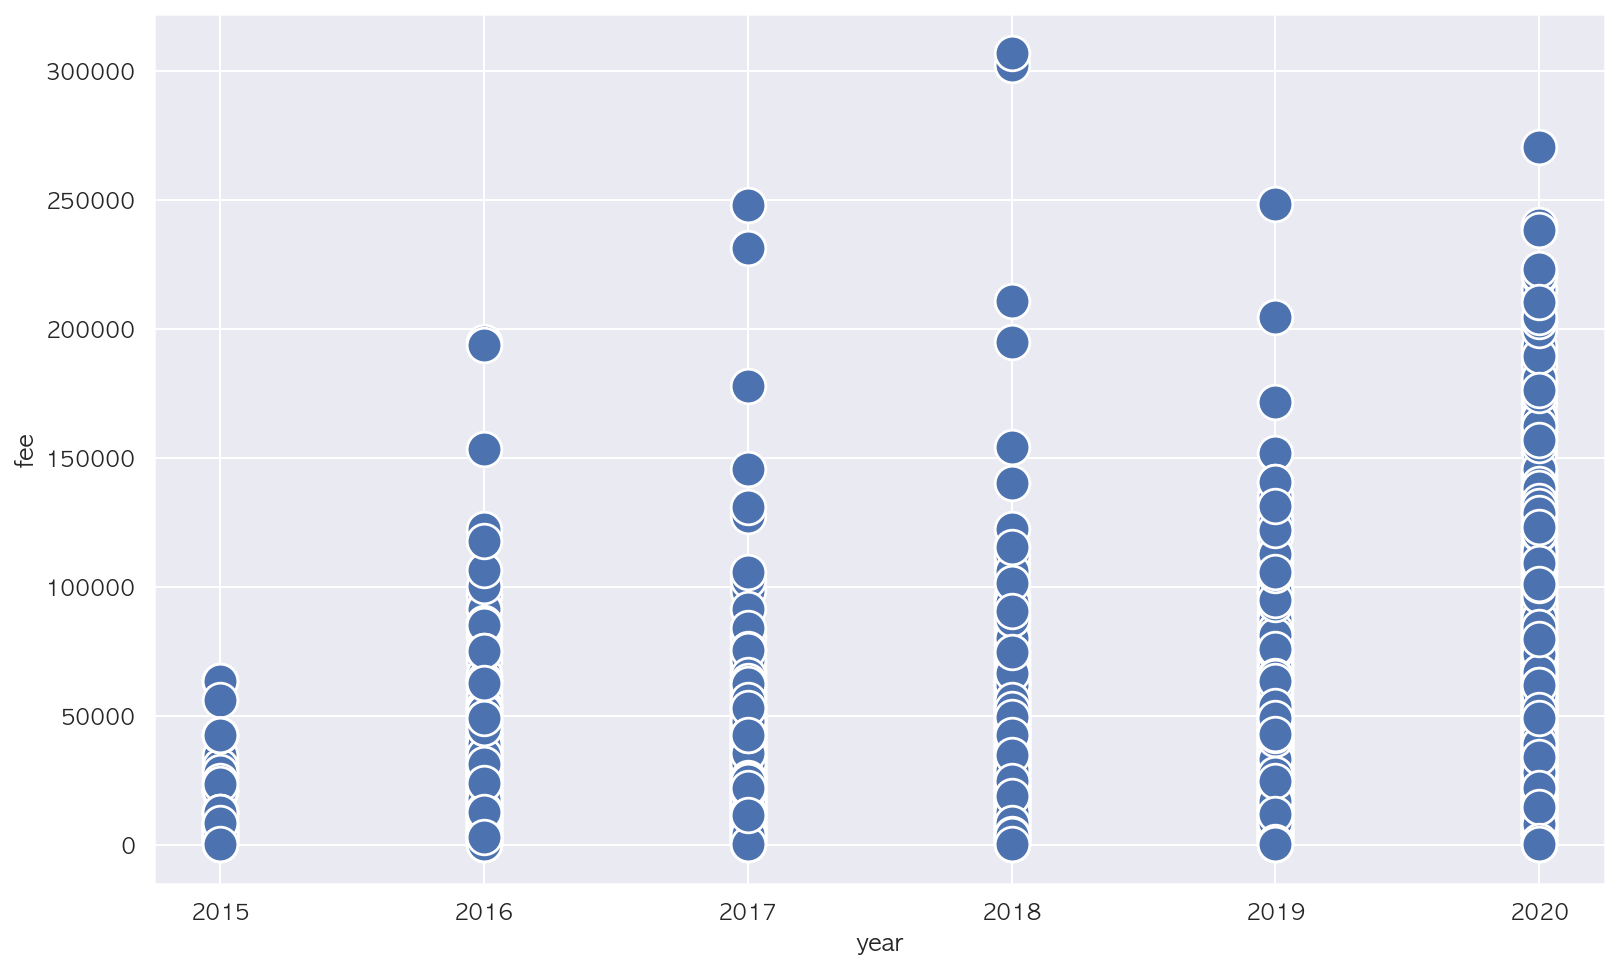

In [19]:
# 년도별 수수료 그래프로 표현
plt.figure(figsize=(13,8))
sns.scatterplot(data=df, x='year', y='fee', s=300)
plt.show()

- 수수료의 정보는 다음과 같다.
    - 평균: **7,247.64 원**
    - 표준편차: 11,920.87 원
    - 최솟값: **400 원**
    - Q1(25%)값: 400 원
    - 중앙값: **4,300 원**
    - Q3(75%)값: 8,500 원
    - 최대값: **307,000 원**
- 평균 수수료는 7천원대, 수수료 최소값은 400원, 중앙값 4,300원, 최대값은 30만원대 이다.
- 여기에서도 알 수 있듯 수수료도 해마다 증가한다(예상환급액이 증가할 수록 당연히 수수료도 증가한다.)
- 가장 많은 수수료 건수가 나타난 해는 2020년도이다.

### 2-6. 수수료 결제 여부 

In [20]:
# 수수료 결제 여부 - 결제 그룹과 미결제그룹을 뽑아서 결제비율 살펴보기 
paid_group = df[df['has_paid'] == True] 
not_paid_group= df[df['has_paid'] == False] 
print('수수료 결제 그룹: 총', len(paid_group), '건')
print('수수료 미결제 그룹: 총', len(not_paid_group), '건')
print('결제비율:', (len(paid_group)/len(df)*100),'%')

수수료 결제 그룹: 총 64639 건
수수료 미결제 그룹: 총 35339 건
결제비율: 64.65322370921602 %


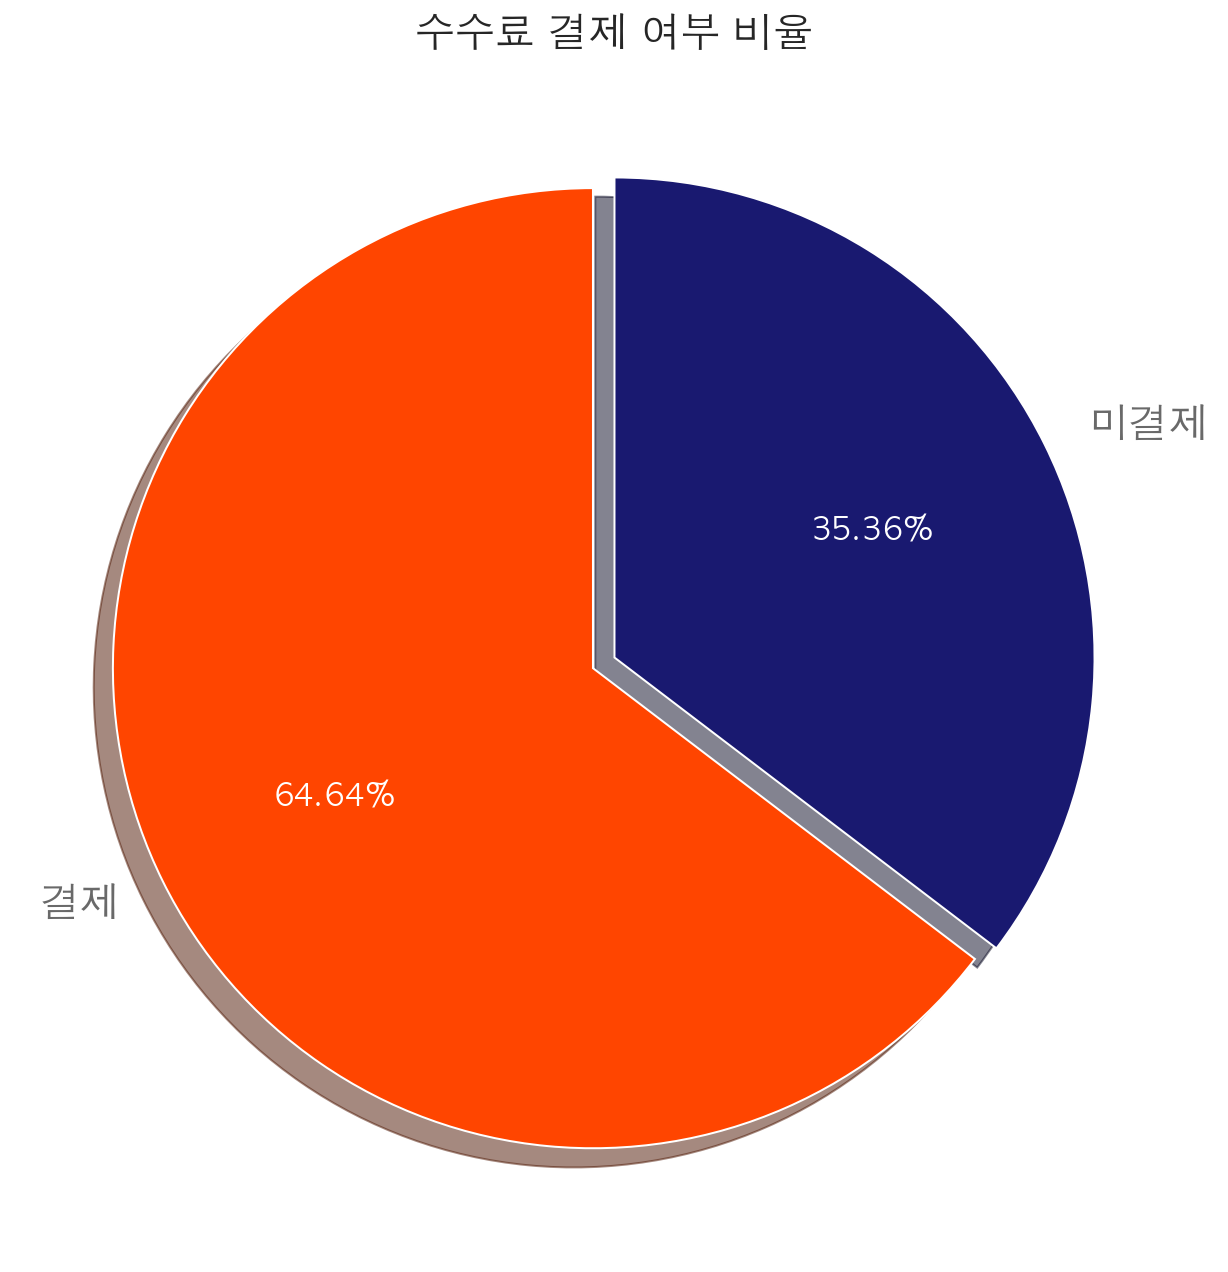

In [21]:
# 전체 수수료 결제 여부
labels = ['결제','미결제'] ## 라벨
frequency = [64643, 35357]   ## 빈도
    
plt.figure(figsize=(13,9)) # 차트 사이즈 
explode = (0.05, 0)  # 튀어나오는 정도 결정 
colors = ['orangered','midnightblue']  
plt.title("수수료 결제 여부 비율", fontsize=20)  # 차트 타이틀
patches, texts, autotexts =  plt.pie(frequency, # 차트에 적용될 값
        explode=explode,  # 특정 값 튀어나오게 강조
        labels=labels,    # 라벨 출력
        colors=colors,    # 색상 설정 
        autopct=lambda p : '{:.2f}%'.format(p) ,  # 퍼센테이지 출력
        shadow=True,     # 차트 그림자 부
        startangle=90    # 시작점을 90도로 지정
       )

## label만 변경해주기 
for t in texts:
    t.set_color("dimgrey")
    t.set_fontsize(20)
## pie 위의 텍스트를 다른 색으로 변경해주기 
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(15)
plt.tight_layout()
plt.show()

plt.show()

- 수수료 결제 여부를 살펴보니 '결제했다'에 64.64%, '결제하지 않았다'에 35.36%로 나타남.
- 수수료 결제를 한 비율이 높긴 하지만 미결제 비율도 만만치 않게 높다.
- 왜 미결제 했는지 면밀히 살펴 볼 필요가 있어 보고, 결제를 이뤄내기 위해 연구해봐야할 부분이다.

### 2-7. 소득

In [23]:
# 각 소들별 정보 확인 
df[['income_근로', 'income_사업', 'income_기타']].describe()

,income_근로,income_사업,income_기타
count,9.997800e+04,9.997800e+04,9.997800e+04
mean,2.624498e+06,1.182827e+06,1.607606e+05
std,5.261090e+06,2.254969e+06,7.959601e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.100000e+04,0.000000e+00
50%,0.000000e+00,3.280000e+05,0.000000e+00
75%,2.996750e+06,1.235000e+06,2.000000e+03
max,1.823350e+08,3.993400e+07,6.281000e+07


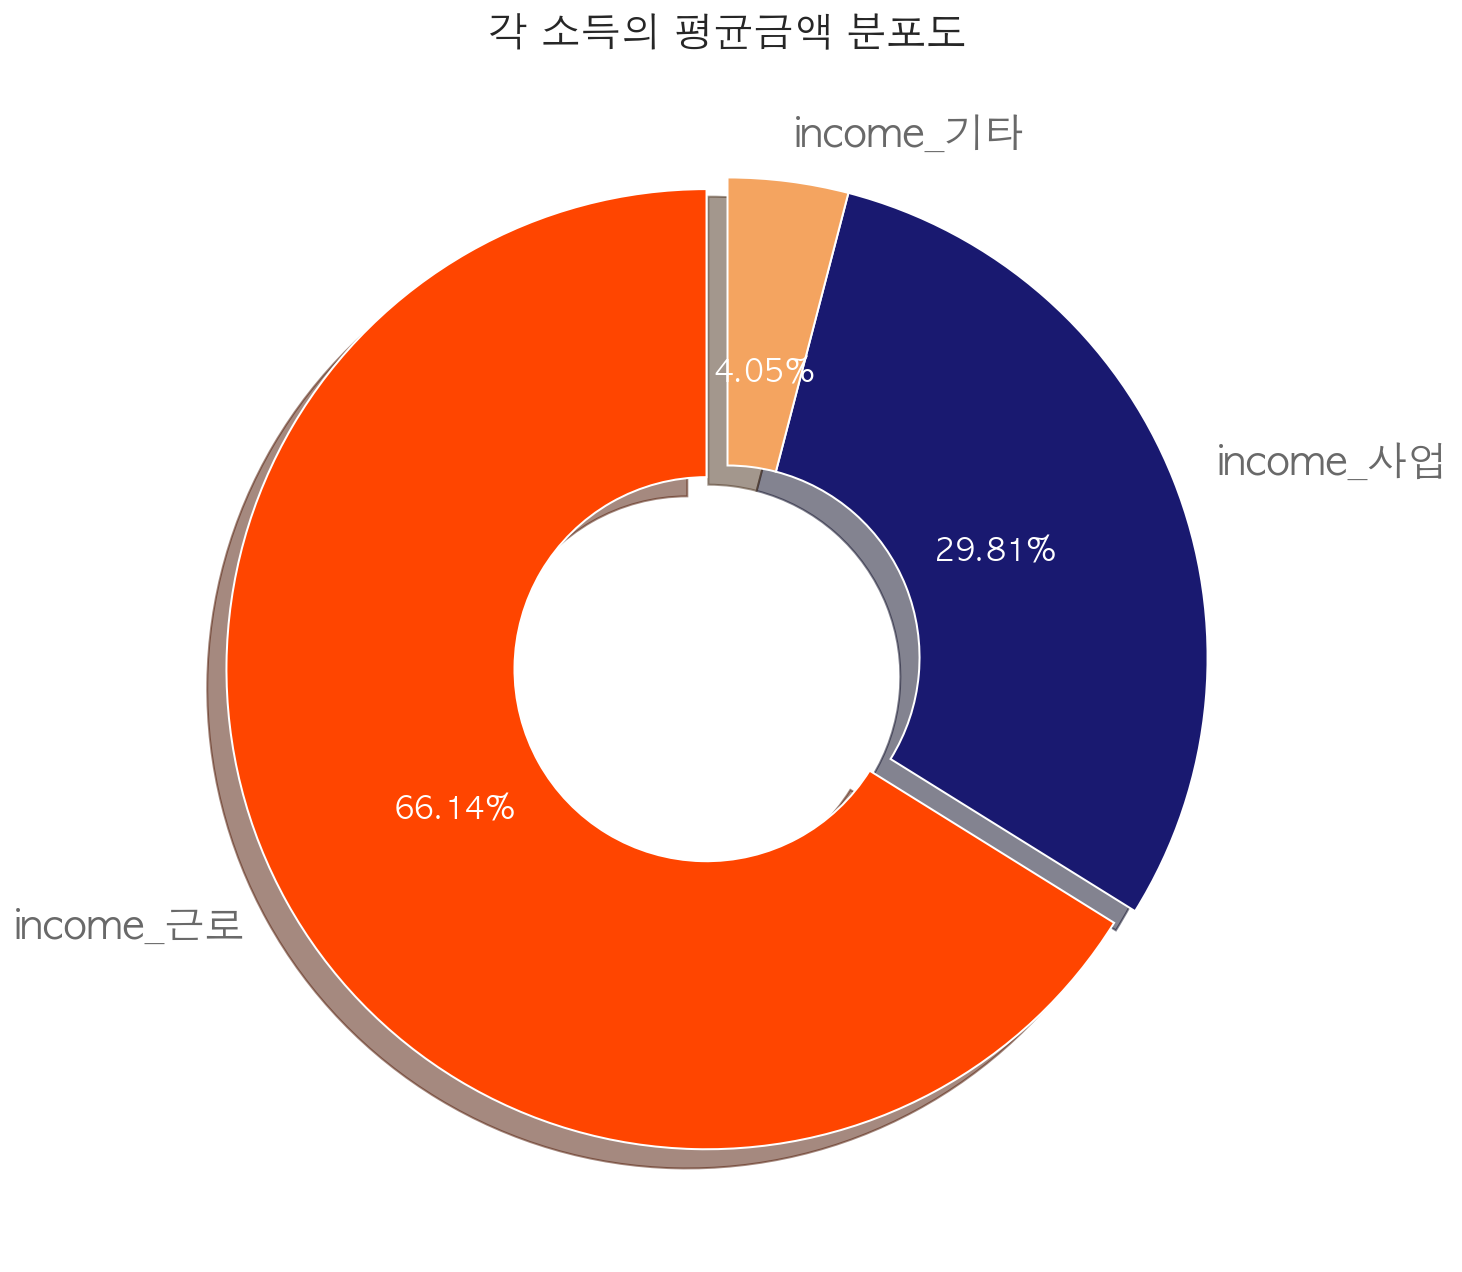

In [24]:
# 각 소득의 평균금액 비교 그래프 

x = df[["income_근로", "income_사업", "income_기타"]].columns
y = [df["income_근로"].mean(), df["income_사업"].mean(), df["income_기타"].mean()]

plt.figure(figsize=(13,9)) # 차트 사이즈 
explode = (0.05, 0, 0)  # 튀어나오는 정도 결정 
colors = ['orangered','midnightblue','sandybrown']  
plt.title("각 소득의 평균금액 분포도", fontsize=20)  # 차트 타이틀
patches, texts, autotexts = plt.pie(y, # 차트에 적용될 값
        explode=explode,  # 특정 값 튀어나오게 강조
        labels=x,    # 라벨 출력
        colors=colors,    # 색상 설정 
        autopct=lambda p : '{:.2f}%'.format(p) ,  # 퍼센테이지 출력
        shadow=True,     # 차트 그림자 부
        startangle=90,    # 시작점을 90도로 지정
        wedgeprops=dict(width=0.6) # 중간의 반지름 0.5 만큼 구멍을 냄
       )

## label만 변경해주기 
for t in texts:
    t.set_color("dimgrey")
    t.set_fontsize(20)
## pie 위의 텍스트를 다른 색으로 변경해주기 
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(15)
plt.tight_layout()
plt.show()

plt.show()

plt.show()

- 소득 비율을 살펴보니 근로소득이 가장 높았고 기타 소득이 가장 낮았다.

### 2-8. 상관관계 그래프 분석 

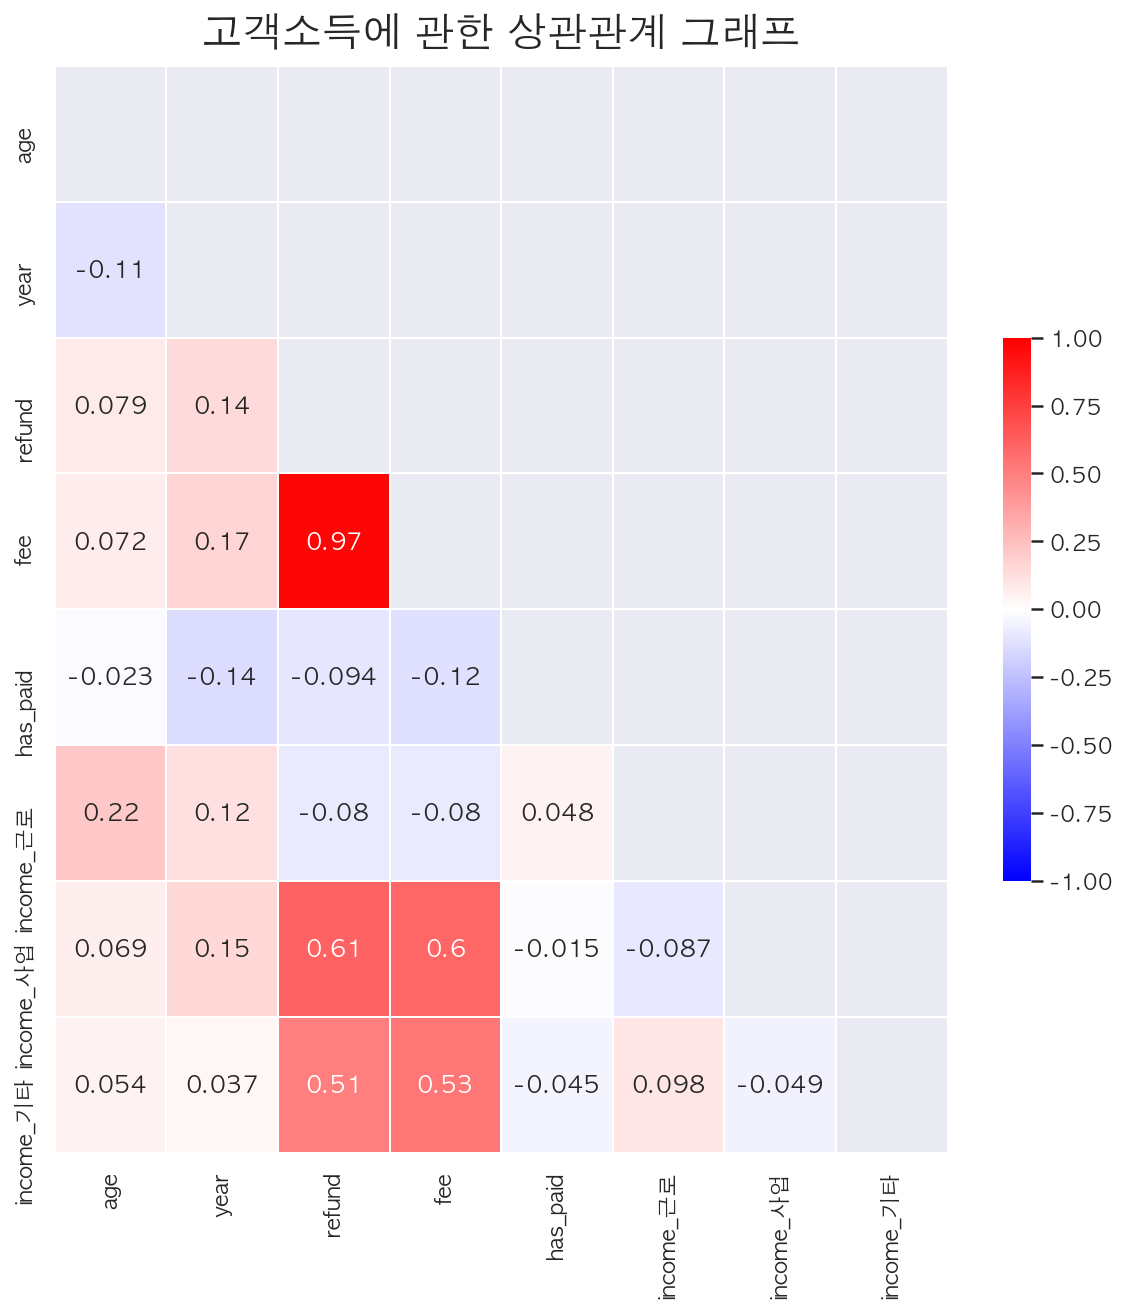

In [25]:
# 상관관계 그래프로 나타내기

a = df.corr()

# 사이즈 지정 
fig, ax = plt.subplots(figsize=(10, 10))

# 삼각형 마스크 만들기 (위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(a, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기 
sns.heatmap(a, 
            cmap = 'bwr', 
            annot = True,   # 실제 값 표시
            mask=mask,      # 표시하지 않을 마스크 부분 지정 
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 젋반으로 줄이기 
            vmin = -1,vmax = 1    # 컬러바 범위 -1 ~ 1
           )  
plt.title('고객소득에 관한 상관관계 그래프', fontsize=20, pad=10)
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
 #          square=True, linewidths=.5, annot=True)
plt.show()

- 환급액에 비례해서 수수료를 지불하기 때문에 수수료와 환급액의 양의 상관관계가 강하다
- 환급액, 수수료와 상관관계를 강하게 보이는 유형은 사업소득과 기타소득 이다.
- 근로소득 환급액, 수수료와 상관관계가 없다. 아마 근로소득은 추후 연말정산을 진행하기 때문에 환급액과 수수료가 없는 것이 아닐까? 라는 추측을 하게 됨.
- 연령과 근로소득에 양의 상관관계가 존재한다. 아마 연차 때문이지 않을까 추측 됨.

## 3. 두 번째 EDA - Feature 자세히 분석하기

### 3-1. 연령대별 결제여부

In [34]:
# 연령대별 결제여부
has_paid_age = df.copy()

# 연령대별로 묶기
has_paid_age['age'][has_paid_age['age'] < 20] = 10    # 10대
has_paid_age['age'][(has_paid_age['age'] >= 20) & (has_paid_age['age'] < 30)] = 20  # 20대
has_paid_age['age'][(has_paid_age['age'] >= 30) & (has_paid_age['age'] < 40)] = 30  # 30대
has_paid_age['age'][(has_paid_age['age'] >= 40) & (has_paid_age['age'] < 50)] = 40  # 40대
has_paid_age['age'][(has_paid_age['age'] >= 50) & (has_paid_age['age'] < 60)] = 50  # 50대
has_paid_age['age'][(has_paid_age['age'] >= 60) & (has_paid_age['age'] < 70)] = 60  # 60대
has_paid_age['age'][has_paid_age['age'] > 70] = 70   # 70대

has_paid_age = pd.crosstab(has_paid_age['age'], has_paid_age['has_paid'])  # 데이터 재구조화 - 구성비율로 교차표 만들기 
has_paid_age['합'] = has_paid_age[0] + has_paid_age[1]  # 데이터 프레임에 결제여부를 모두 더한 컬럼을 추가 
has_paid_age['결제비율(%)'] = round(has_paid_age[1] / has_paid_age['합'], 3) * 100  # 결제비율을 계산하는 컬럼추가 
has_paid_age

has_paid,False,True,합,결제비율(%)
age,,,,
10.0,392,886,1278,69.3
20.0,23201,43761,66962,65.4
30.0,8083,14099,22182,63.6
40.0,2301,3601,5902,61.0
50.0,1195,1927,3122,61.7
60.0,158,329,487,67.6
70.0,9,36,45,80.0


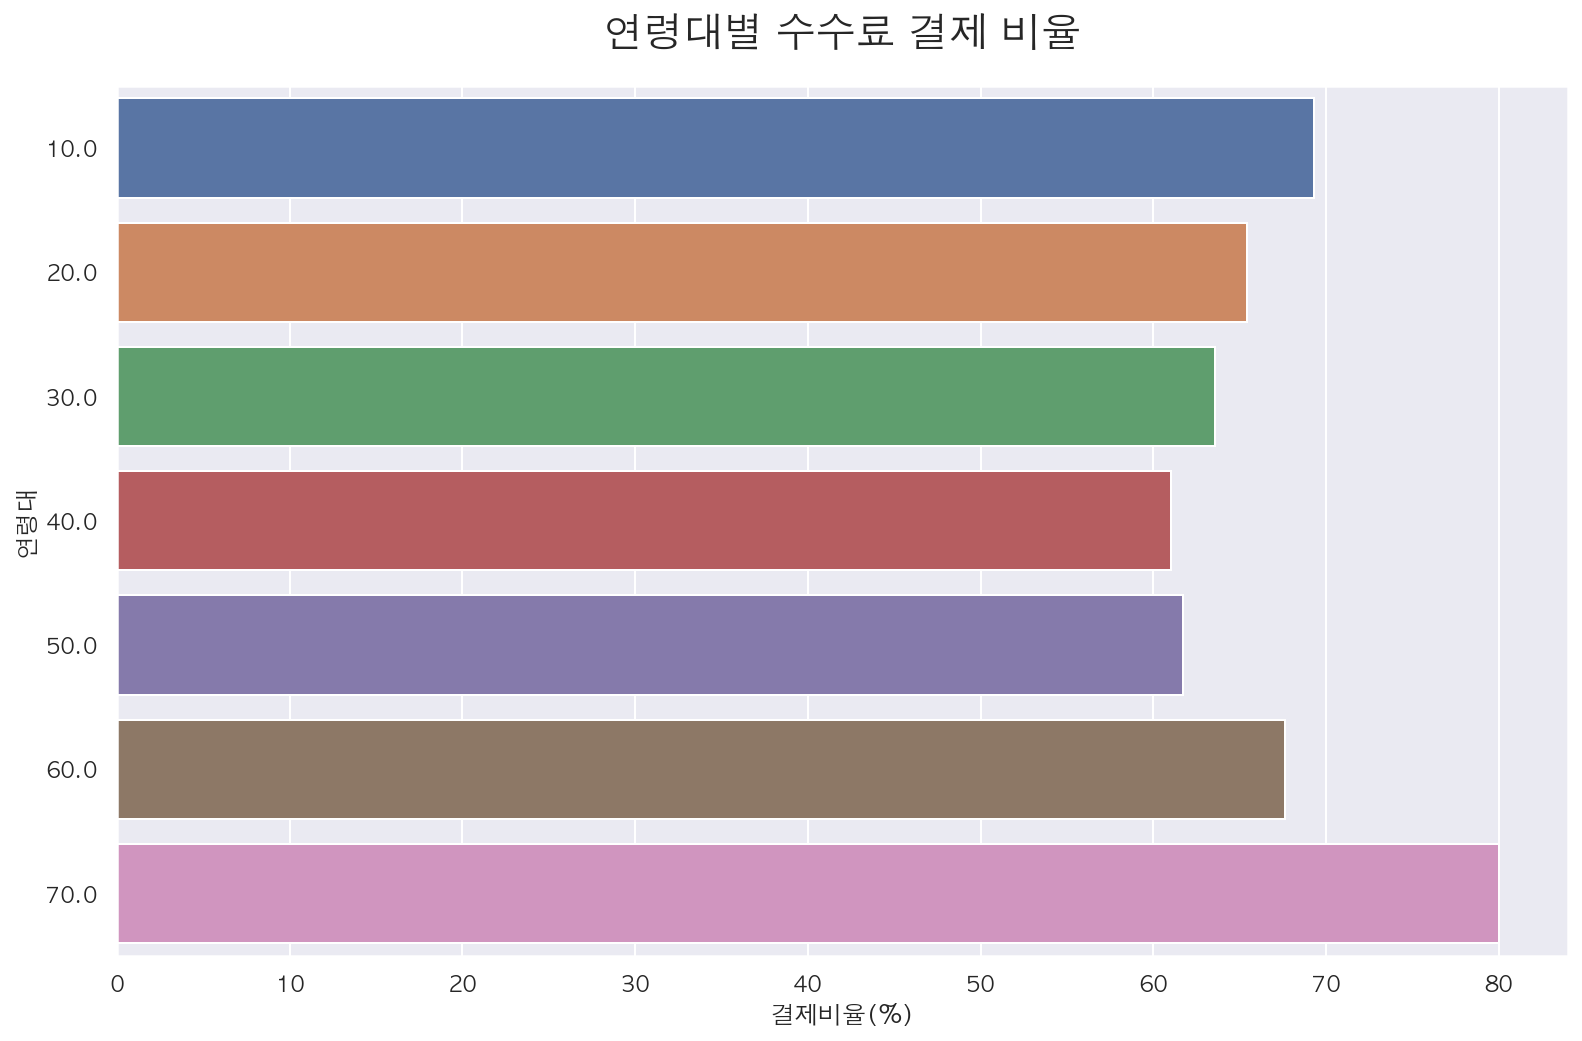

In [35]:
# 그래프로 나타내기 
plt. figure(figsize=(13, 8))
sns.barplot(data=has_paid_age, x='결제비율(%)', y = has_paid_age.index, orient='h')
plt.ylabel("연령대")
plt.title('연령대별 수수료 결제 비율', fontsize=20, pad=20)
plt.show()

In [42]:
def show_plot(feature):
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
    sns.boxplot(y=df[feature], x=df["has_paid"])
    plt.ylabel(feature, fontsize=12)
    plt.xlabel("has_paid(결제여부)", fontsize=12)
    plt.subplot(1,2,2)
    sns.stripplot(y=df[feature], x=df["has_paid"])
    plt.ylabel(feature, fontsize=12)
    plt.xlabel("has_paid(결제여부)", fontsize=12)
    plt.show()

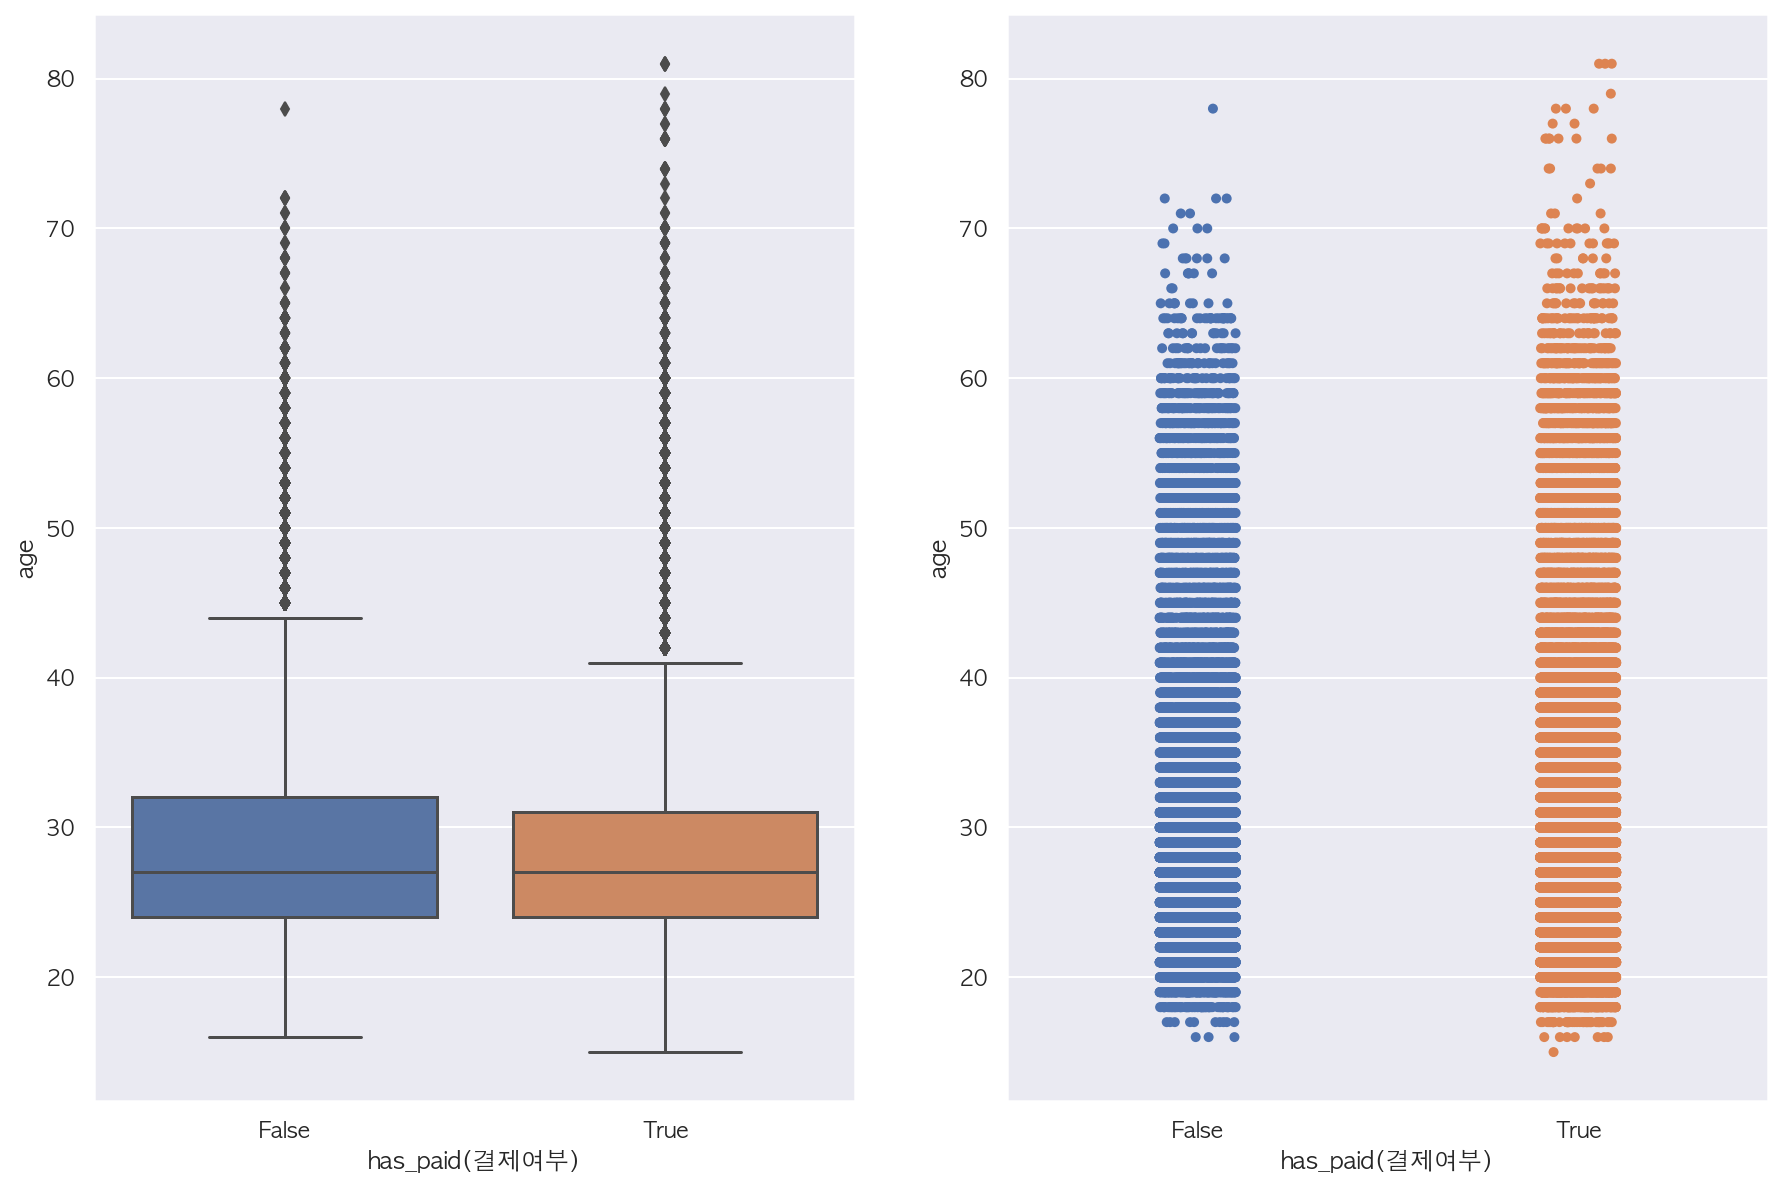

In [43]:
show_plot("age")  # age 피처의 특성 확인

### 3-2. 성별 수수료 결제비율 

In [36]:
# 성별 수수료 결제비율 
has_paid_gender = df.copy()
has_paid_gender = pd.crosstab(has_paid_gender['gender'], 
                              has_paid_gender['has_paid'])  # 데이터 재구조화 - 구성비율로 교차표 만들기 
has_paid_gender['합'] = has_paid_gender[0] + has_paid_gender[1]  # 데이터 프레임에 결제여부를 모두 더한 컬럼을 추가 
has_paid_gender['결제비율(%)'] = round(has_paid_gender[1] / has_paid_gender['합'], 3) * 100  # 결제비율을 계산하는 컬럼추가
has_paid_gender = has_paid_gender.sort_values(by='결제비율(%)' ,ascending=False) # 결제비율 기준으로 내림차순 정렬 
has_paid_gender

has_paid,False,True,합,결제비율(%)
gender,,,,
M,17225,33252,50477,65.9
F,18114,31387,49501,63.4


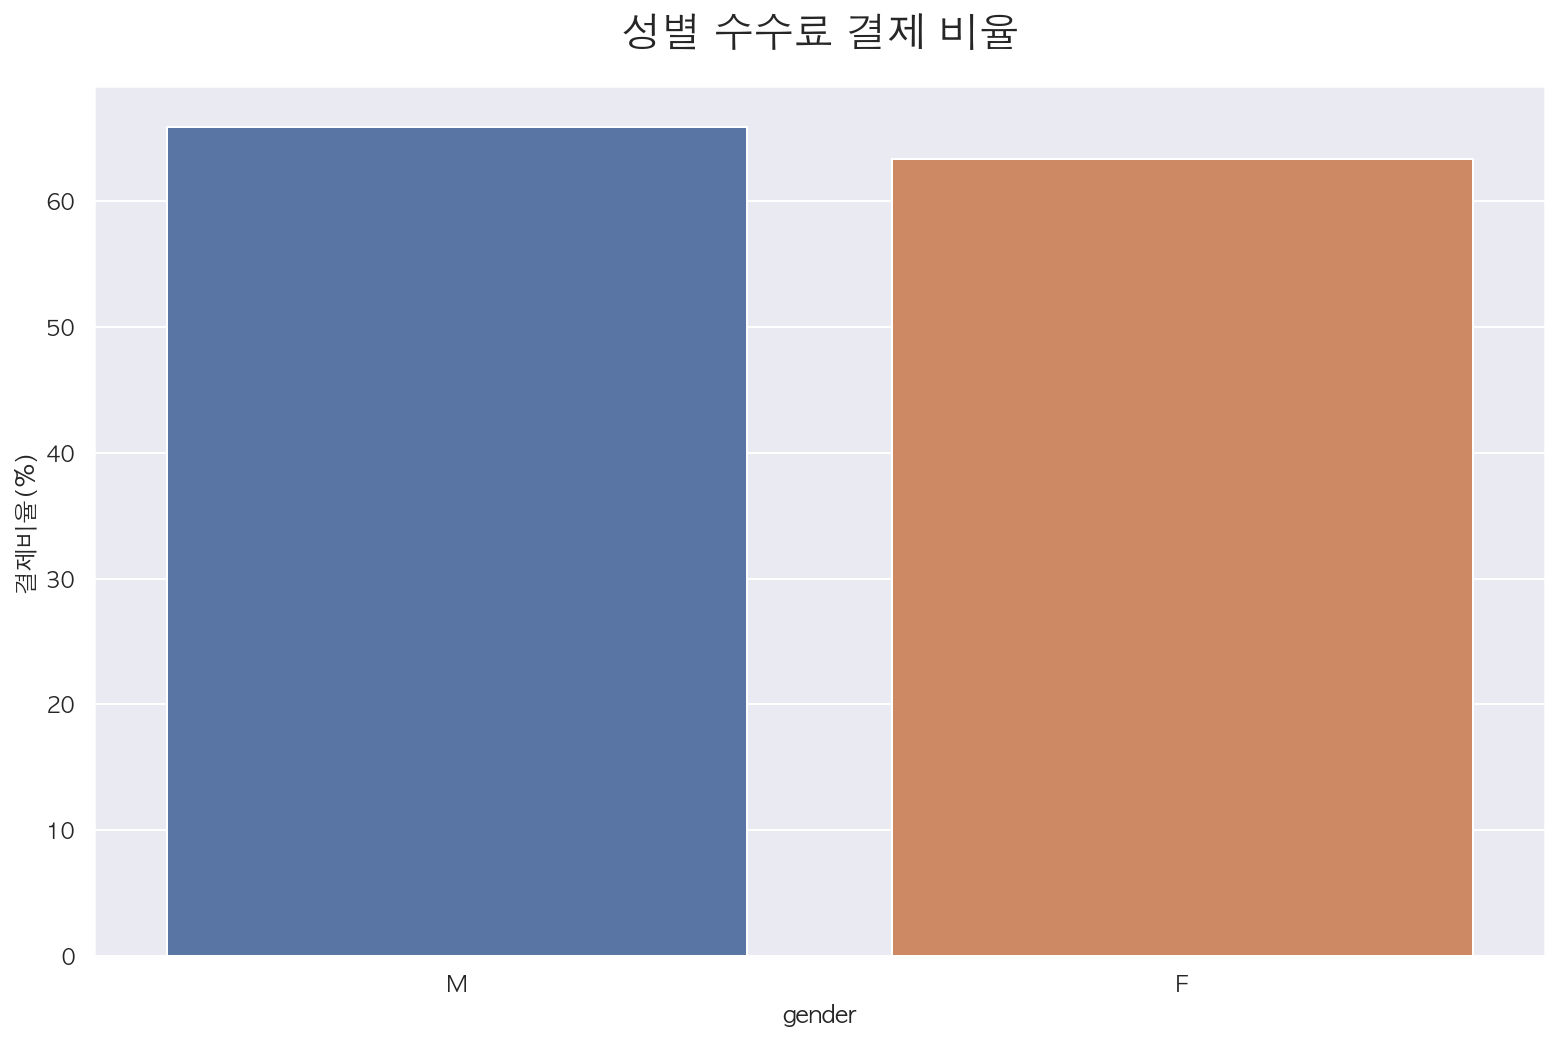

In [37]:
# 그래프로 나타내기 
plt. figure(figsize=(13, 8))
sns.barplot(data=has_paid_gender, x=has_paid_gender.index, y='결제비율(%)')
plt.title('성별 수수료 결제 비율', fontsize=20, pad=20)
plt.show()

### 3-3. 년도별 수수료 결제비율 

In [38]:
# 년별 수수료 결제비율 
has_paid_year = df.copy()
has_paid_year = pd.crosstab(has_paid_year['year'], has_paid_year['has_paid'])  # 데이터 재구조화 - 구성비율로 교차표 만들기 
has_paid_year['합'] = has_paid_year[0] + has_paid_year[1]  # 데이터 프레임에 결제여부를 모두 더한 컬럼을 추가 
has_paid_year['결제비율(%)'] = round(has_paid_year[1] / has_paid_year['합'], 3) * 100  # 결제비율을 계산하는 컬럼추가
has_paid_year

has_paid,False,True,합,결제비율(%)
year,,,,
2015,1149,2831,3980,71.1
2016,4213,9697,13910,69.7
2017,5289,12203,17492,69.8
2018,6091,13887,19978,69.5
2019,6355,14481,20836,69.5
2020,12242,11540,23782,48.5


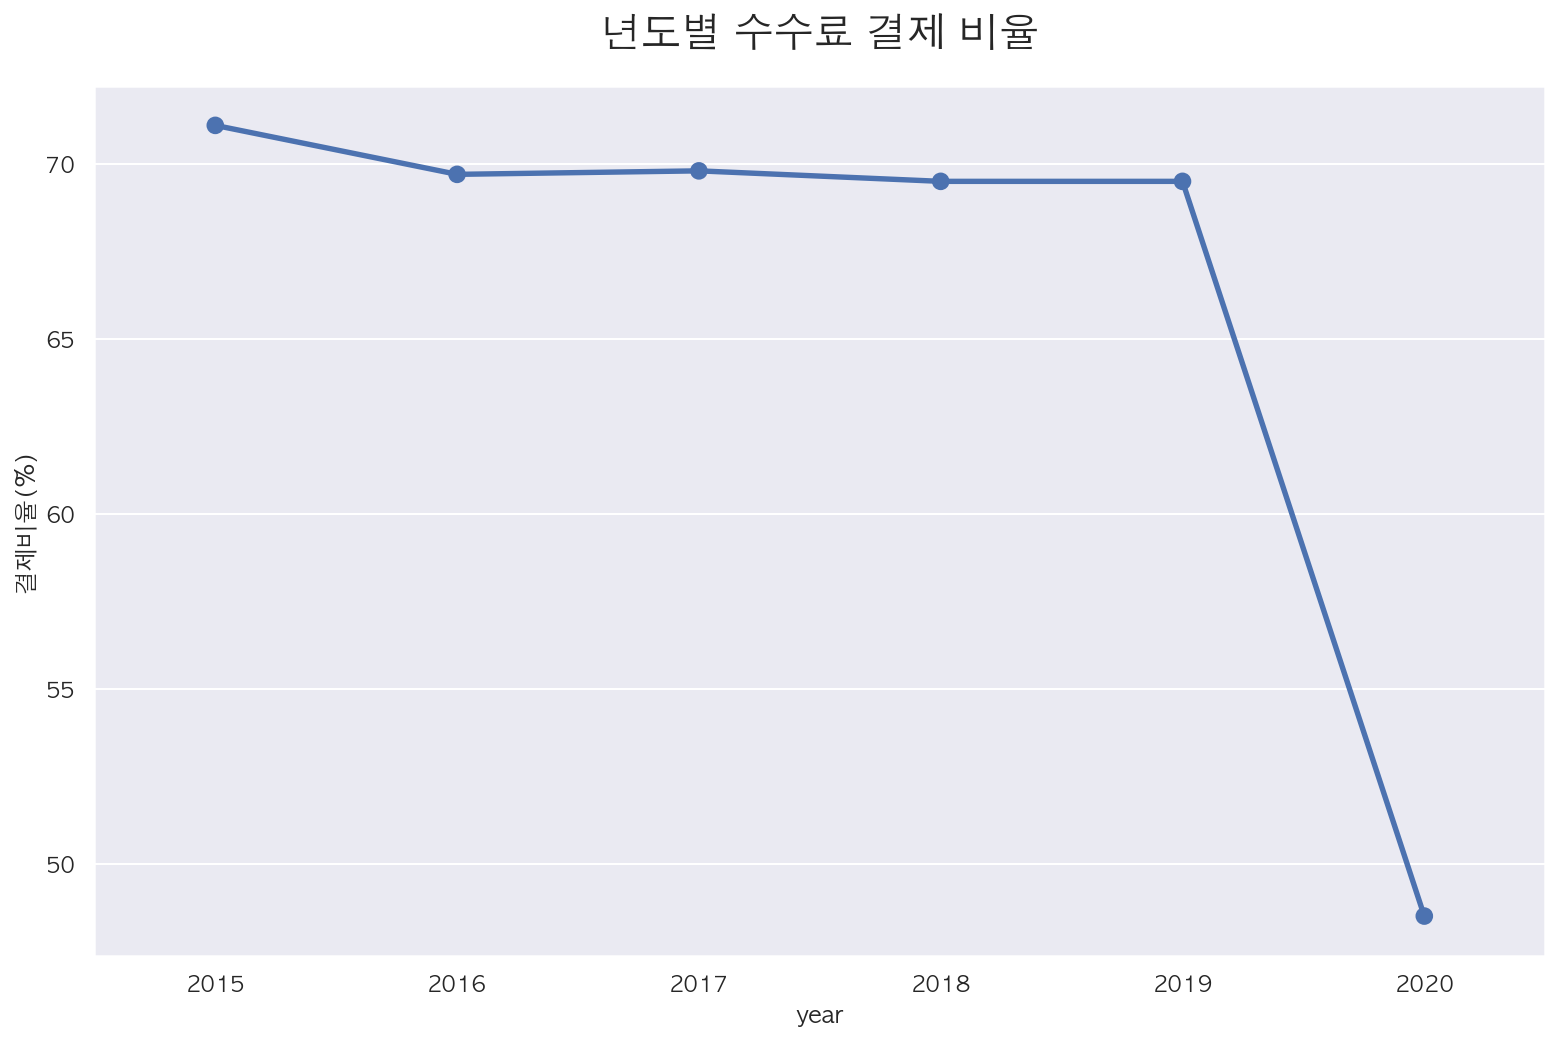

In [39]:
# 그래프로 나타내기 
plt. figure(figsize=(13, 8))
sns.pointplot(data=has_paid_year, x=has_paid_year.index, y = '결제비율(%)')
plt.ylabel("결제비율(%)")
plt.title('년도별 수수료 결제 비율', fontsize=20, pad=20)
plt.show()

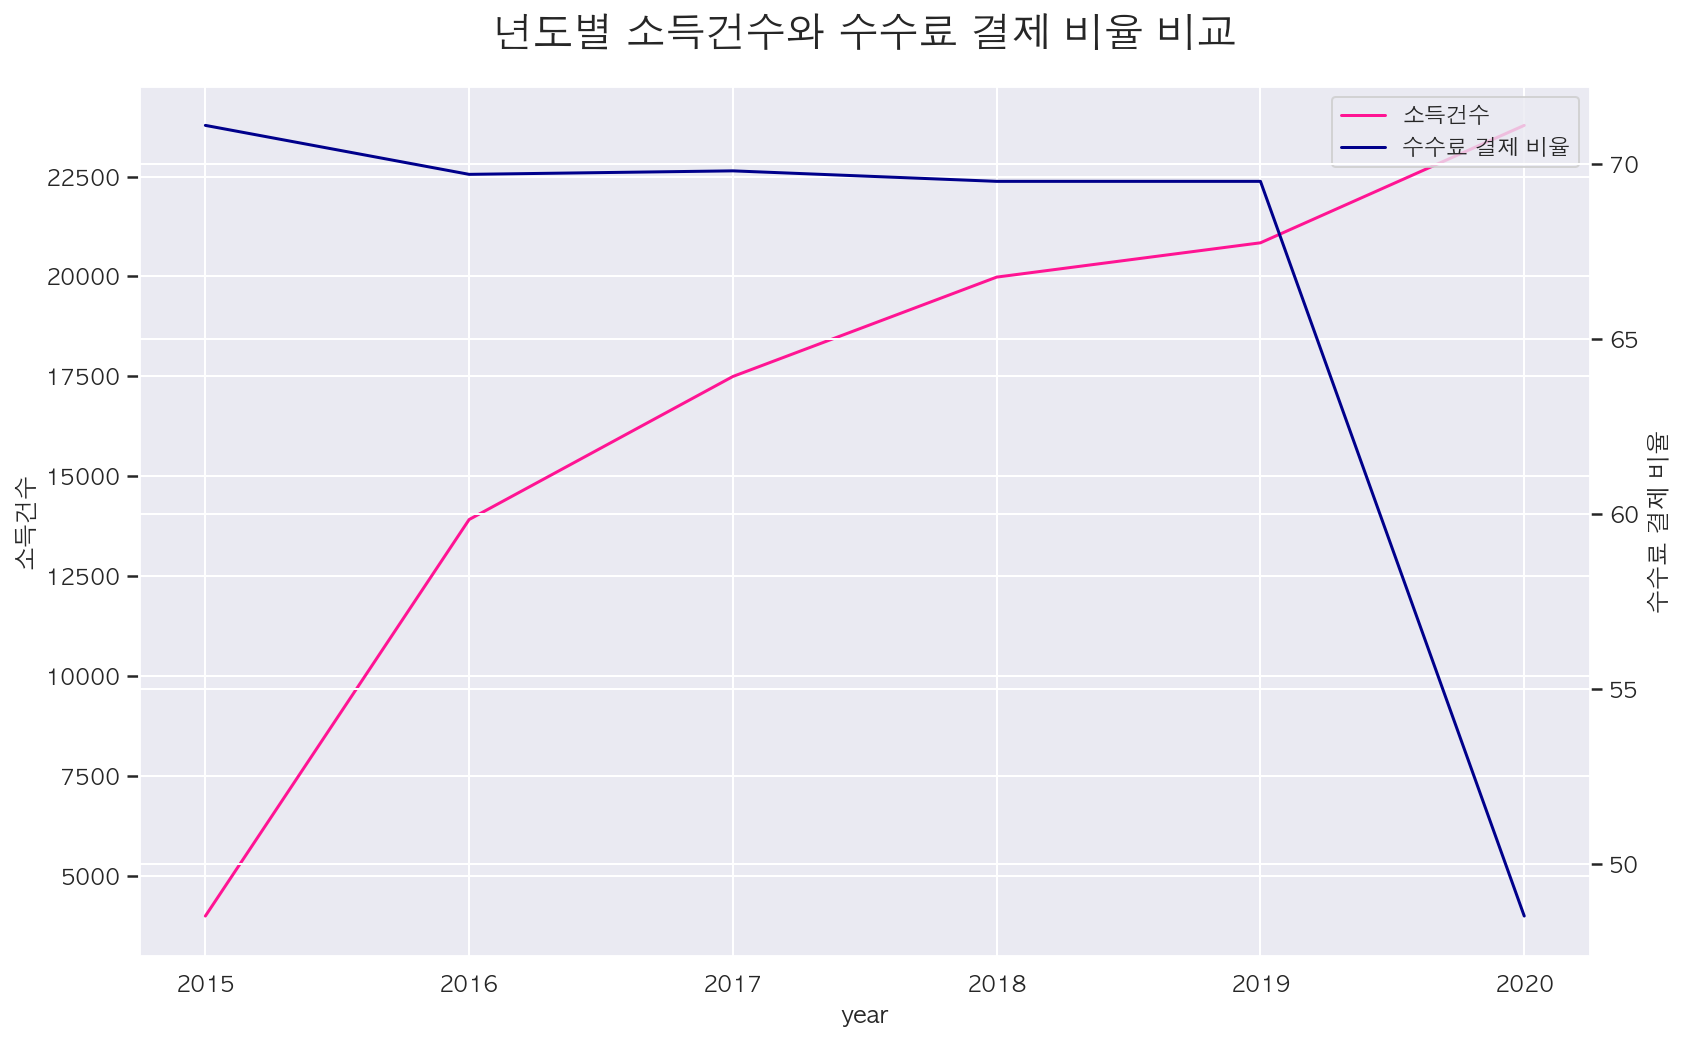

In [40]:
# 소득년도와 수수료 결제 비율 년도 비교 
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['font.size'] = 12

x = df_year['year']
y1 = df_year['case']
y2 = has_paid_year['결제비율(%)']

fig, ax1 = plt.subplots()
ax1.set_xlabel('year')
ax1.set_ylabel('소득건수')
line1 = ax1.plot(x, y1, color='deeppink', label='소득건수')

ax2 = ax1.twinx()
ax2.set_ylabel('수수료 결제 비율')
line2 = ax2.plot(x, y2, color='darkblue', label='수수료 결제 비율')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.title("년도별 소득건수와 수수료 결제 비율 비교", fontsize=20, pad=20)
plt.show()

- 조금 더 디테일하게 들어가보니 수수료 결제가 높은 연령대는 70대 이상 이다. 하지만 70대 이상은 건수가 많이 없기 때문에 의미가 없을 것 같고, 대부분 전 연령대가 결제비율이 60%대 이다. (연령대 별로 구분하는 것은 의미가 없어 보인다. 대부분 결제는 20대에서 30대 즉 소득활동을 하는 사람들이 결제가 많이 이루어진 것으로 보인다)
- 성별기준 남성이 결제비율이 높았다. 하지만 셩별도 마찬가지 차이가 2%대 밖에 나지않기 때문에 해당 해당 데이터로 구분하는 것은 의미가 없어 보인다.
- 년도별 수수료 결제비율은 2015년이 높았다.여기서 주목할 점은 소득이 늘어나 2020년도에 예상세액이 늘어났는데, 수수료 결제 비율은 2020년도가 가장 낮았다.

### 3-4. 상관관계가 있는 Feature 위주로 jointplot 그리기 

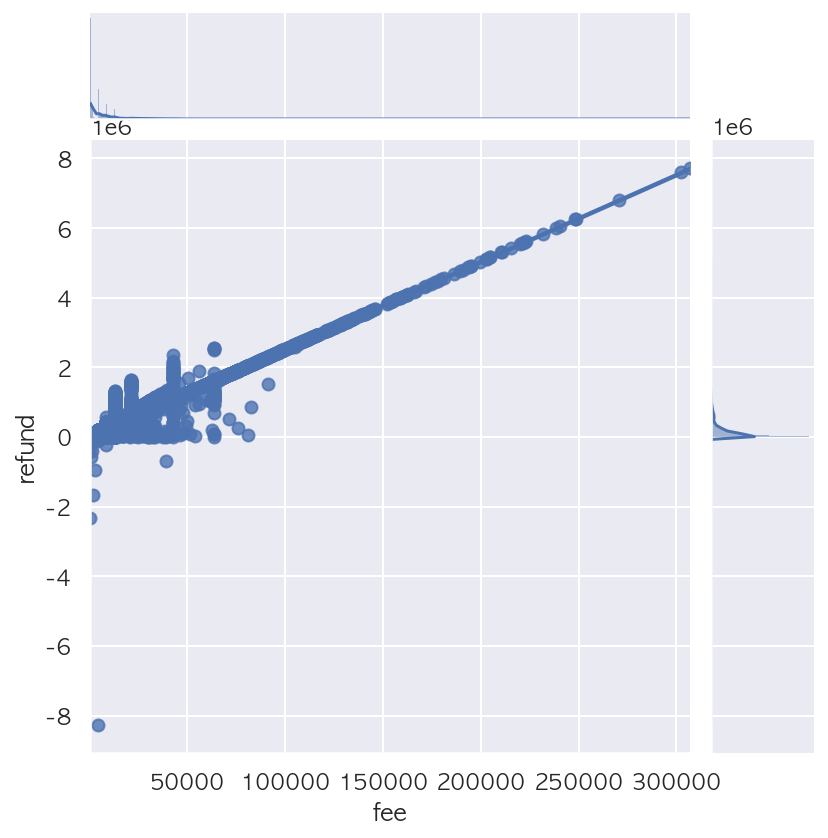

In [22]:
# 예상환급액 대비 수수료 선형회귀 그래프 
sns.jointplot(data=df, x="fee", y="refund", kind="reg");

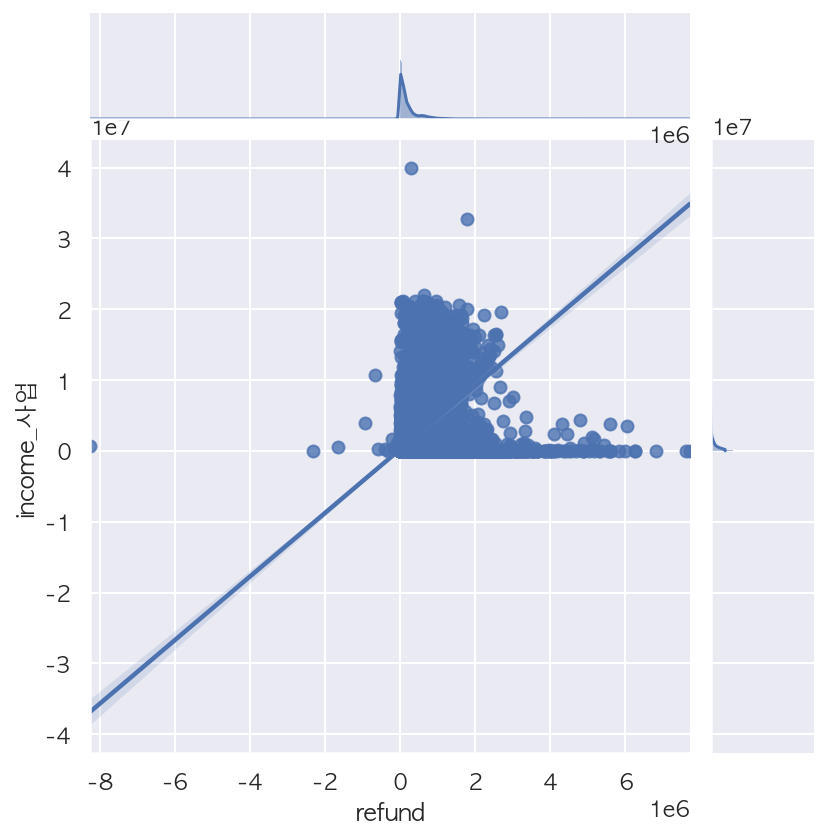

In [27]:
# 예상환급액 대비 사업소득 선형회귀 그래프 
sns.jointplot(data=df, x="refund", y="income_사업", kind="reg");

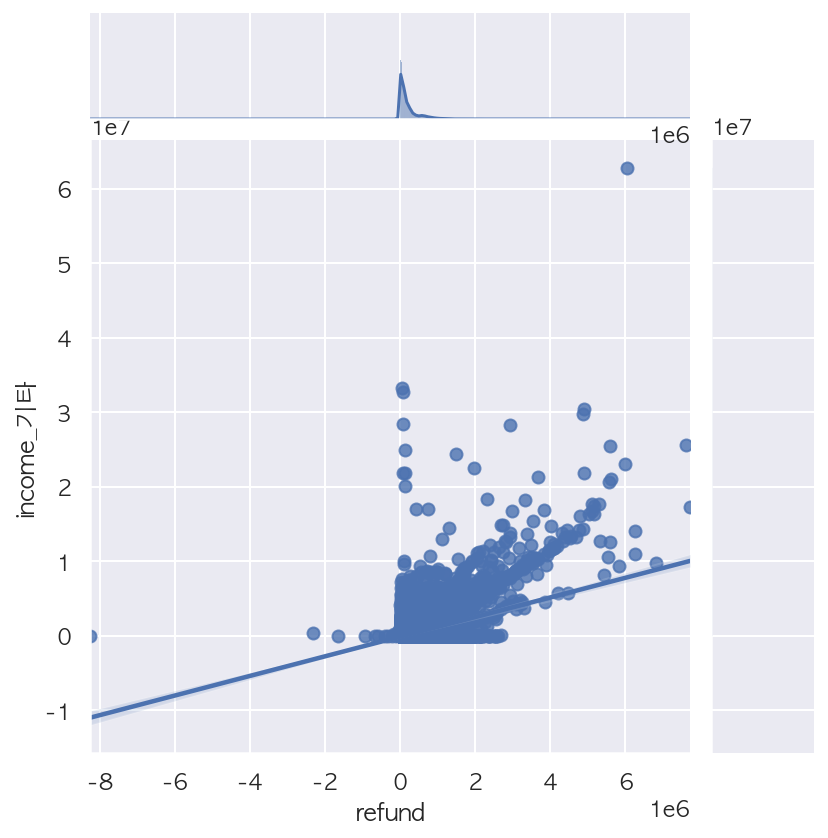

In [31]:
# 예상환급액 대비 기타소득 선형회귀 그래프 
sns.jointplot(data=df, x="refund", y="income_기타", kind="reg");

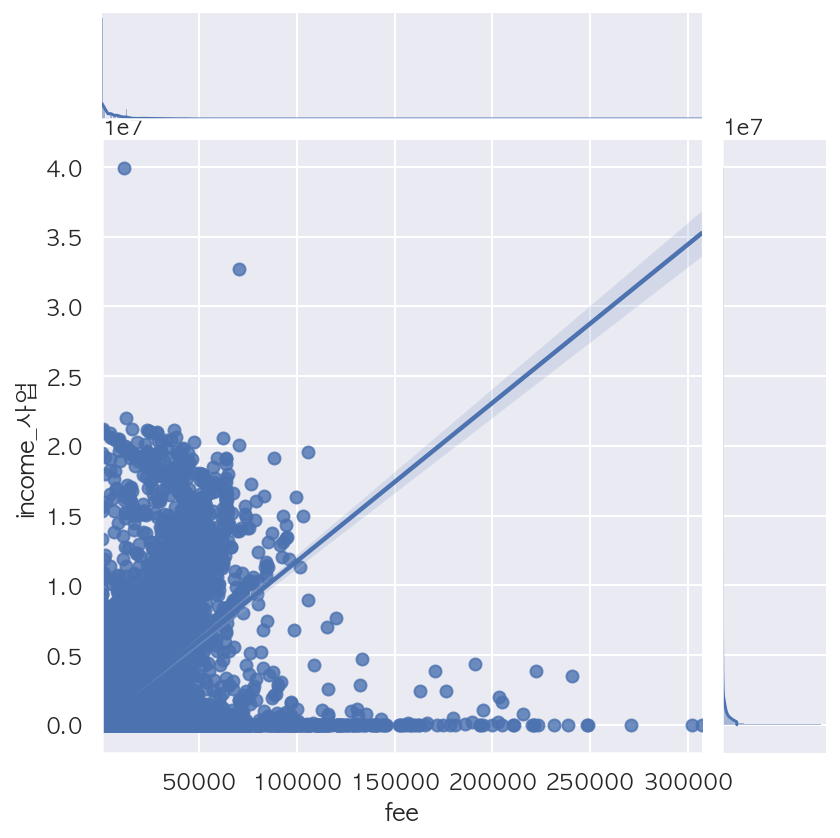

In [29]:
# 수수료 대비 사업소득선형회귀 그래프 
sns.jointplot(data=df, x="fee", y="income_사업", kind="reg");

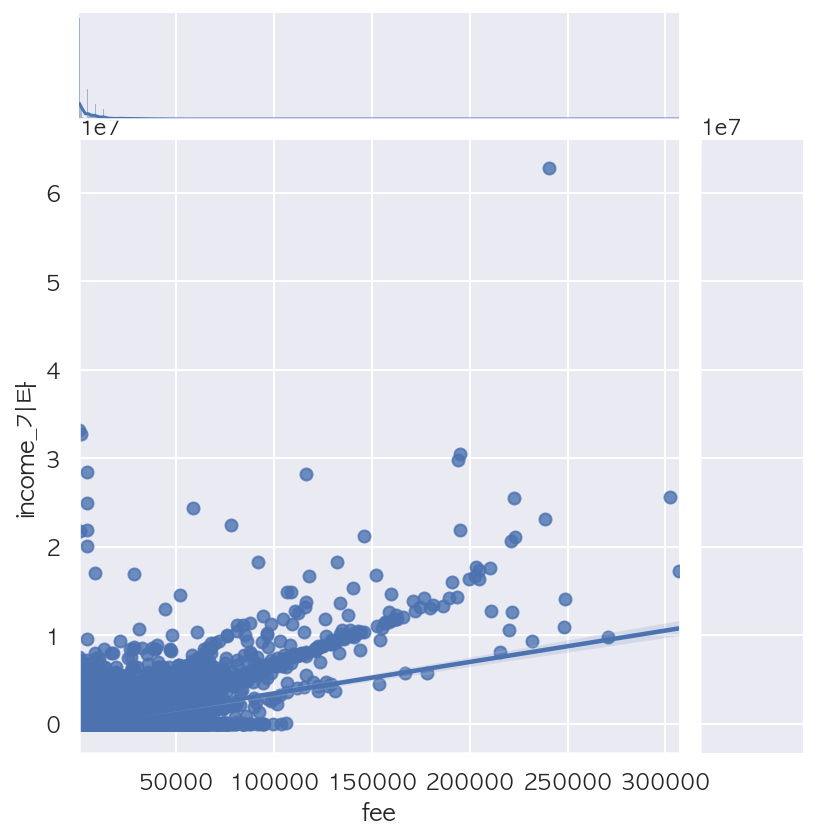

In [30]:
# 수수료 대비 기타소득 선형회귀 그래프 
sns.jointplot(data=df, x="fee", y="income_기타", kind="reg");

### 3-5. 회귀분석을 통해 예측치 나타내기

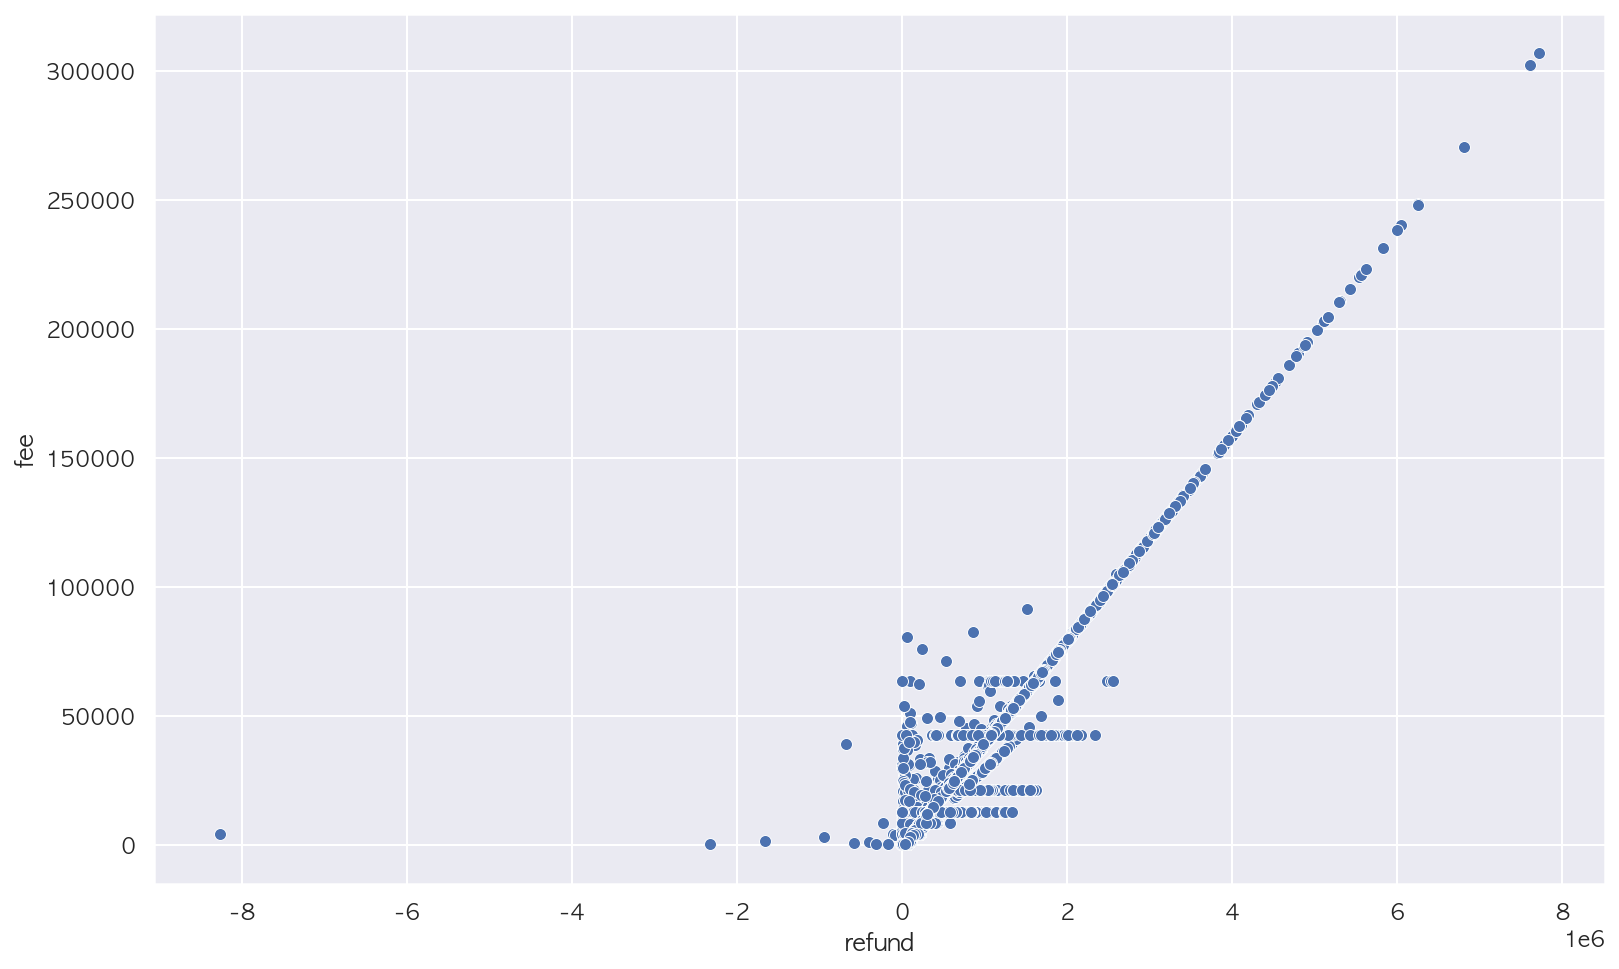

In [46]:
X = df["refund"] # 입력데이터
y = df["fee"] # 정답데이터
sns.scatterplot(x = X, y = y)
plt.show()

In [47]:
# 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 선형회귀(Linear Regression) 모델 선언하기
lr = LinearRegression()

# 선형회귀(Linear Regression) 모델 학습하기
# reshape 부분을 유의!
lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [48]:
# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = lr.predict(X_test.values.reshape(-1,1))
y_pred

array([ 4240.86292774,  2777.77334761, 13694.67252241, ...,
        5328.80133347,  8179.95025885, 19547.03084292])

In [49]:
y_test

52120     8500.0
59544     1700.0
82145     8500.0
20489    12800.0
45431     9800.0
          ...   
46486      400.0
92340     1300.0
30359     6000.0
87815     6800.0
61290    21300.0
Name: fee, Length: 19996, dtype: float64

In [50]:
# MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 7187301.955062527
RMSE : 2680.914387865179


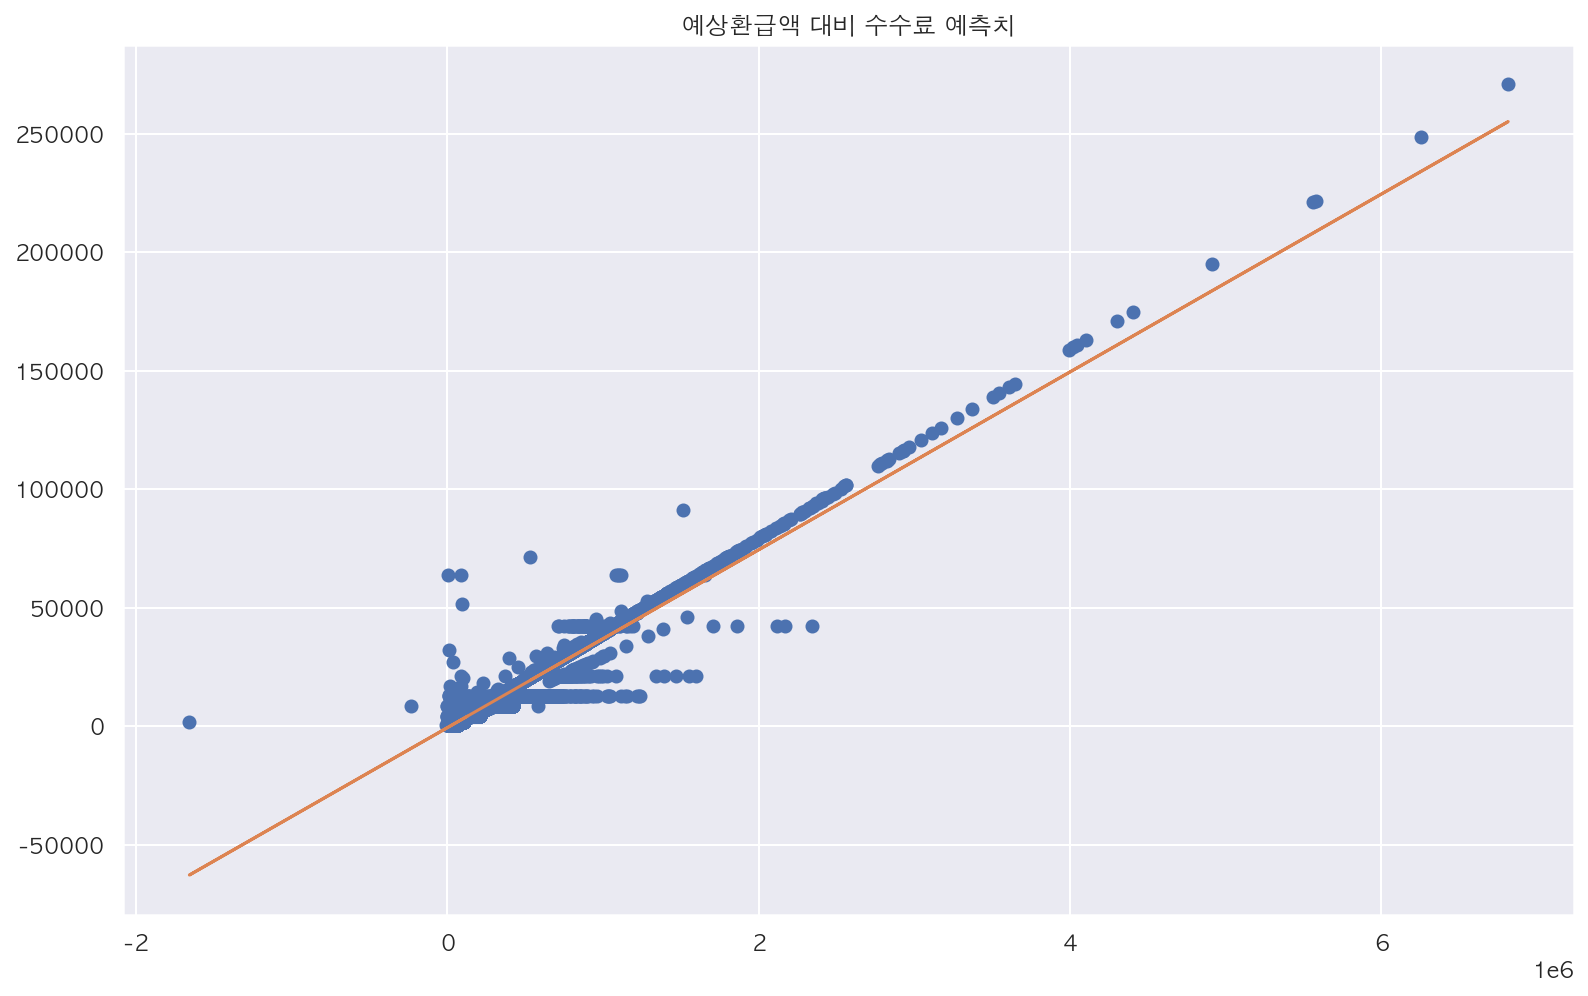

In [52]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, lr.predict(X_test.values.reshape(-1,1)))
plt.title('예상환급액 대비 수수료 예측치')
plt.show()

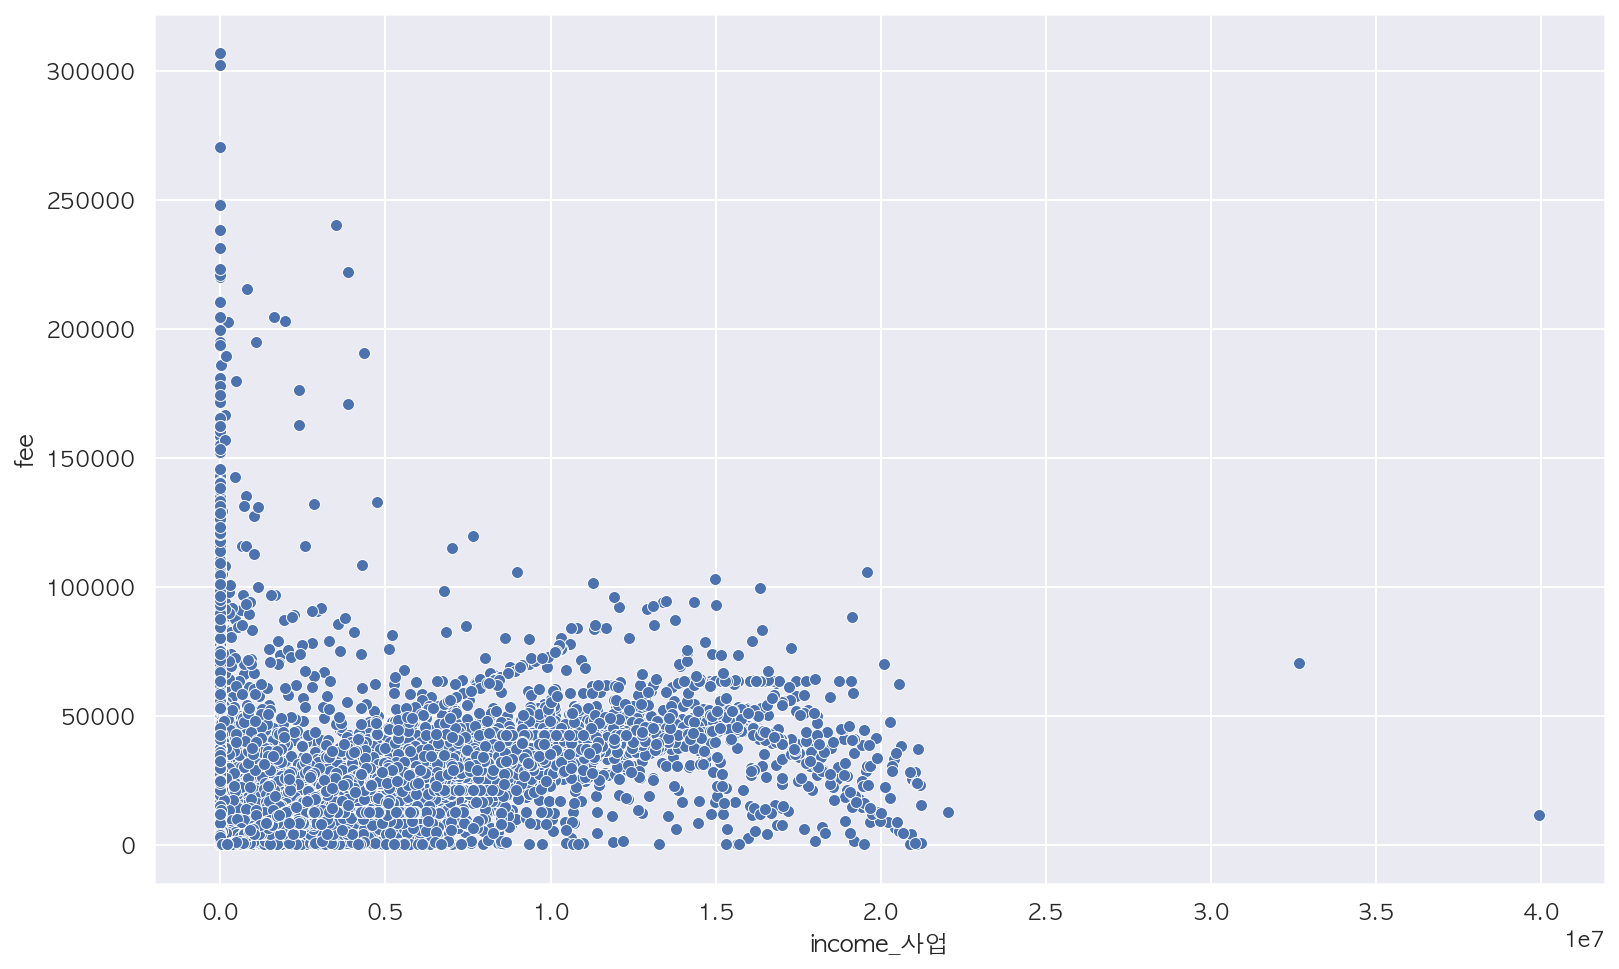

In [59]:
X = df["income_사업"] # 입력데이터
y = df["fee"] # 정답데이터
sns.scatterplot(x = X, y = y)
plt.show()

In [60]:
# 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 선형회귀(Linear Regression) 모델 선언하기
lr = LinearRegression()

# 선형회귀(Linear Regression) 모델 학습하기
# reshape 부분을 유의!
lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [61]:
# 테스트 데이터에 대한 예측을 수행합니다.
y_pred = lr.predict(X_test.values.reshape(-1,1))
y_pred

array([ 5596.47628009,  5005.18436466, 14930.66737281, ...,
        4461.32228203,  3670.82506889,  3844.73445578])

In [62]:
y_test

41631     1300.0
14624     4300.0
84423    23800.0
87342     6000.0
6016      1700.0
          ...   
24116      400.0
12071    16600.0
24784      400.0
52213      400.0
33523      400.0
Name: fee, Length: 19996, dtype: float64

In [63]:
# MSE(Mean Squared Error)를 측정합니다.
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정합니다.
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 89442431.69765724
RMSE : 9457.400895471083


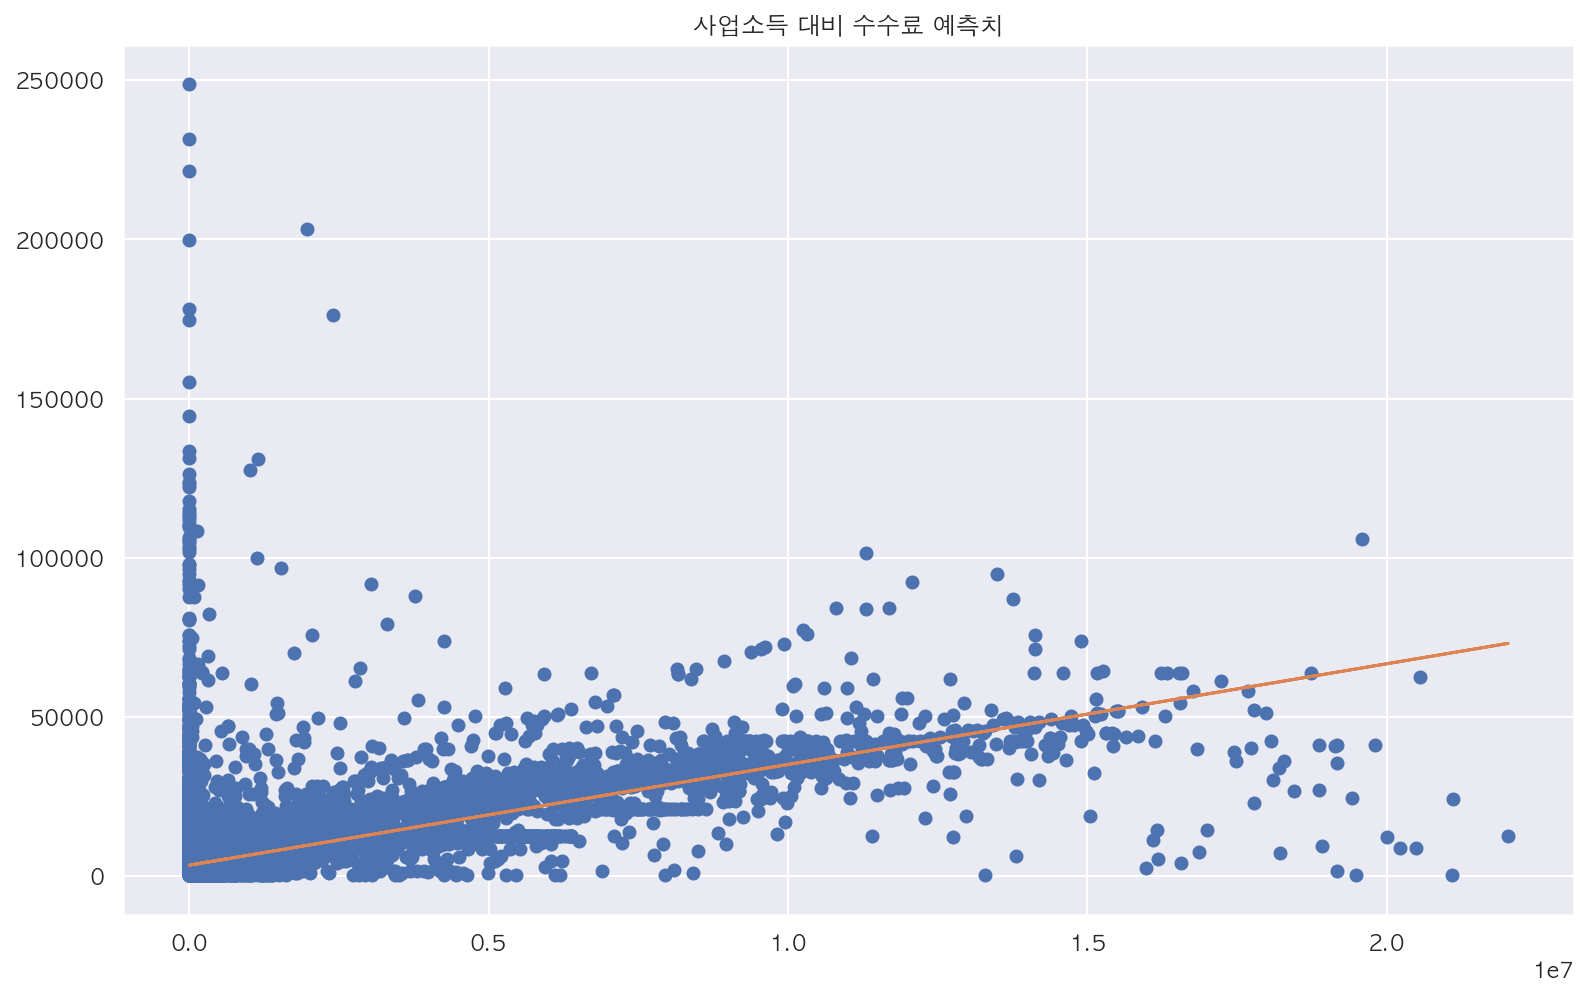

In [65]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, lr.predict(X_test.values.reshape(-1,1)))
plt.title('사업소득 대비 수수료 예측치')
plt.show()

### 2차 탐색 결과 
1. **소득은 해마다 증가**한다. 이는 물가상승률과 해마다 증가하는 연봉의 원인으로 파악된다. 
2. 삼쩜삼의 고객층 중 가장 많은 연령대는 **20대 이다..** 아무래도 소득활동을 가장 활발하게 하는 연령대이기 때문이다.
3. 삼쩜삼의 고객층은 근소한 **0.98% 포인트** 차이로 **남성이 많다**. 사실상, 남성 여성 두루두루 사용한다고 봐도 무방하다. 
4. 예상세액이 늘어날 수록 서비스 수수료도 늘어난다. - 이는 소득과 관련되어 있으므로, 소득이 늘면 당연히 return 받을 수 있는 세액은 늘어난다. 그것에 따라 수수료는 당연히 늘수 밖에 없다.
5. 삼쩜삼에서 제공하는 예상환급액 서비스를 제공받고 **수수료를 결제한 비율이 높지만, 생각보다 결제를 하지 않은 비율도 낮다고 볼 수 없다.** 여기서 주목할 점은 소득이 늘어 세액조회를 하는 건수는 해마다 늘어나는데, 수수료를 결제하는 비율은 점점 줄어들었고, 2020년을 기점으로 그 꺾임새가 많이 꺾였다.
6. 상관관계를 통해서 안 사실은 **수수료와 환급액**의 상관관계가 제일 높았다. (당연히 환급액 서비스를 받고 수수료를 내야하는 특성상 그렇다고 볼 수 있다.)
7. 환급액과 수수료와 상관관계를 강하게 보이는 유형은 **사업소득과 기타소득**이다.(아무래도 근로소득 같은 경우 연말정산을 받기때문에 음의 상관관계를 나타냈다고 보여짐)
8. 그래서 상관관계가 높은 Feature들을 기준으로 회귀분석을 모델을 돌려보았더니 대체적으로 잘 예측하는 것을 볼 수 있다.

#### 1. 그래서 " 고객의 결제여부에 영향을 미치는 요인들은 무엇인가?" 당연한 이야기겠지만 '예상환급액' 대비 그에따른 서비스 '수수료' 이다. 왜 그럴까라고 생각해본다면, 개인적인 소견이지만, 고객의 입장에서 생각해본다면 예상환급액을 많이 받았는데, 수수료가 높다면, 그렇게 유쾌하지 않을 것 같다라는 생각이 들것 같다 반대로 예상환급액을 적게 받았지만, 수수로가 적다면, 아 공돈생겼는데, 이 정도 수수료는 내주지 라고 생각하지 않을까?
#### 2. 그렇다면 "고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야하는가?" 여기에 나와있는대로 아마 소득 중 근로소득 고객보다 사업소득 및 기타소득을 기준으로 고객에게 서비스를 어필하면 받을 수 있지 않을까 생각됨. 근로소득은 연마다 연말 정산을 실시하여 따로 삼쩜쌈과 같은 서비스를 받을 필요성을 못느낄 듯 하다.